# SWSP Project - WESAD Dataset EDA

### Introduction
In this notebook we will explore the extracted features from the WESAD dataset.

In [28]:
%reload_ext pretty_jupyter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pretty_jupyter.helpers import matplotlib_fig_to_markdown

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Now we will import the data:

In [29]:
data = pd.read_csv('data/m14_merged.csv')
data.head()

Unnamed: 0  net_acc_mean  net_acc_std  net_acc_min  net_acc_max  \
0           0      1.397968     0.141481     1.109299     1.678399   
1           1      1.210132     0.091882     1.014138     1.485800   
2           2      1.010977     0.102315     0.832216     1.190967   
3           3      0.775187     0.046391     0.693996     0.876819   
4           4      0.657494     0.034540     0.594667     0.718106   

   EDA_phasic_mean  EDA_phasic_std  EDA_phasic_min  EDA_phasic_max  \
0         1.824289        1.088328        0.367977        4.319987   
1         2.109146        1.223528        0.539150        4.459367   
2         0.152828        0.128896        0.006950        0.544346   
3         0.177595        0.126167        0.002789        0.361388   
4         0.035014        0.039616        0.001144        0.132781   

   EDA_smna_mean  EDA_smna_std  EDA_smna_min  EDA_smna_max  EDA_tonic_mean  \
0       1.284376      1.952823  5.229656e-08     11.712596        1.232164   
1       1.467865      2.852510  3.096902e-08     17.418821        0.377615   
2       0.105091      0.244891  4.725602e-08      1.300810        1.727696   
3       0.110786      0.199704  2.787285e-08      1.105898        0.987927   
4       0.026716      0.114738  5.174645e-08      0.997037        0.772262   

   EDA_tonic_std  EDA_tonic_min  EDA_tonic_max  BVP_mean     BVP_std  BVP_min  \
0       0.997487      -0.599164       2.554750 -0.181673  107.648359  -358.13   
1       1.172221      -1.213173       1.871490 -0.830147  118.742089  -392.28   
2       0.293389       1.137304       2.037179  0.939683   42.190039  -240.61   
3       0.042388       0.912441       1.127602  0.107404   41.606872  -289.26   
4       0.077628       0.615685       0.907833 -0.073620   43.121633  -197.37   

   BVP_max  TEMP_mean  TEMP_std  TEMP_min  TEMP_max  ACC_x_mean  ACC_x_std  \
0   554.77  35.817091  0.012674     35.79     35.84    0.029510   0.011145   
1   438.16  35.797568  0.029901     35.75     35.87    0.017352   0.020817   
2   209.89  35.712909  0.027612     35.66     35.75    0.020839   0.011034   
3   145.36  35.700811  0.019504     35.66     35.73    0.034449   0.003185   
4   194.12  35.744727  0.019386     35.71     35.79    0.028870   0.004379   

   ACC_x_min  ACC_x_max  ACC_y_mean  ACC_y_std  ACC_y_min  ACC_y_max  \
0  -0.024082   0.087383    0.000020   0.000008  -0.000017   0.000060   
1  -0.037843   0.071558    0.000012   0.000014  -0.000026   0.000049   
2   0.002752   0.054356    0.000014   0.000008   0.000002   0.000037   
3   0.013761   0.040595    0.000024   0.000002   0.000009   0.000028   
4   0.013761   0.038531    0.000020   0.000003   0.000009   0.000027   

   ACC_z_mean  ACC_z_std  ACC_z_min  ACC_z_max  Resp_mean  Resp_std  Resp_min  \
0    0.000020   0.000008  -0.000017   0.000060   0.148184  2.935617 -8.805847   
1    0.000012   0.000014  -0.000026   0.000049   0.037545  2.843123 -8.168030   
2    0.000014   0.000008   0.000002   0.000037  -0.021862  1.700333 -2.914429   
3    0.000024   0.000002   0.000009   0.000028   0.097563  1.483260 -2.818298   
4    0.000020   0.000003   0.000009   0.000027   0.062545  1.501585 -3.242493   

   Resp_max    0_mean     0_std     0_min     0_max  BVP_peak_freq  \
0  6.504822  0.029937  0.009942  0.000000  0.087383       0.135670   
1  6.742859  0.021986  0.015845  0.000000  0.071558       0.095023   
2  3.260803  0.020839  0.011034  0.002752  0.054356       0.076880   
3  3.730774  0.034449  0.003185  0.013761  0.040595       0.140271   
4  2.912903  0.028870  0.004379  0.013761  0.038531       0.149321   

   TEMP_slope  subject  label  age  height  weight  gender_ female  \
0   -0.000169        2      1   27     175      80               0   
1   -0.000789        2      1   27     175      80               0   
2   -0.000717        2      1   27     175      80               0   
3    0.000075        2      1   27     175      80               0   
4    0.000442        2      1   27     175   

In [30]:
data.shape

(1178, 59)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1178 non-null   int64  
 1   net_acc_mean        1178 non-null   float64
 2   net_acc_std         1178 non-null   float64
 3   net_acc_min         1178 non-null   float64
 4   net_acc_max         1178 non-null   float64
 5   EDA_phasic_mean     1178 non-null   float64
 6   EDA_phasic_std      1178 non-null   float64
 7   EDA_phasic_min      1178 non-null   float64
 8   EDA_phasic_max      1178 non-null   float64
 9   EDA_smna_mean       1178 non-null   float64
 10  EDA_smna_std        1178 non-null   float64
 11  EDA_smna_min        1178 non-null   float64
 12  EDA_smna_max        1178 non-null   float64
 13  EDA_tonic_mean      1178 non-null   float64
 14  EDA_tonic_std       1178 non-null   float64
 15  EDA_tonic_min       1178 non-null   float64
 16  EDA_to

We can observe that the all the data is numeric and there are no missing values. We will remove the first column as it is just a clone of the index.

In [32]:
data = data.drop([data.columns[0]], axis=1)
data.head()

net_acc_mean  net_acc_std  net_acc_min  net_acc_max  EDA_phasic_mean  \
0      1.397968     0.141481     1.109299     1.678399         1.824289   
1      1.210132     0.091882     1.014138     1.485800         2.109146   
2      1.010977     0.102315     0.832216     1.190967         0.152828   
3      0.775187     0.046391     0.693996     0.876819         0.177595   
4      0.657494     0.034540     0.594667     0.718106         0.035014   

   EDA_phasic_std  EDA_phasic_min  EDA_phasic_max  EDA_smna_mean  \
0        1.088328        0.367977        4.319987       1.284376   
1        1.223528        0.539150        4.459367       1.467865   
2        0.128896        0.006950        0.544346       0.105091   
3        0.126167        0.002789        0.361388       0.110786   
4        0.039616        0.001144        0.132781       0.026716   

   EDA_smna_std  EDA_smna_min  EDA_smna_max  EDA_tonic_mean  EDA_tonic_std  \
0      1.952823  5.229656e-08     11.712596        1.232164       0.997487   
1      2.852510  3.096902e-08     17.418821        0.377615       1.172221   
2      0.244891  4.725602e-08      1.300810        1.727696       0.293389   
3      0.199704  2.787285e-08      1.105898        0.987927       0.042388   
4      0.114738  5.174645e-08      0.997037        0.772262       0.077628   

   EDA_tonic_min  EDA_tonic_max  BVP_mean     BVP_std  BVP_min  BVP_max  \
0      -0.599164       2.554750 -0.181673  107.648359  -358.13   554.77   
1      -1.213173       1.871490 -0.830147  118.742089  -392.28   438.16   
2       1.137304       2.037179  0.939683   42.190039  -240.61   209.89   
3       0.912441       1.127602  0.107404   41.606872  -289.26   145.36   
4       0.615685       0.907833 -0.073620   43.121633  -197.37   194.12   

   TEMP_mean  TEMP_std  TEMP_min  TEMP_max  ACC_x_mean  ACC_x_std  ACC_x_min  \
0  35.817091  0.012674     35.79     35.84    0.029510   0.011145  -0.024082   
1  35.797568  0.029901     35.75     35.87    0.017352   0.020817  -0.037843   
2  35.712909  0.027612     35.66     35.75    0.020839   0.011034   0.002752   
3  35.700811  0.019504     35.66     35.73    0.034449   0.003185   0.013761   
4  35.744727  0.019386     35.71     35.79    0.028870   0.004379   0.013761   

   ACC_x_max  ACC_y_mean  ACC_y_std  ACC_y_min  ACC_y_max  ACC_z_mean  \
0   0.087383    0.000020   0.000008  -0.000017   0.000060    0.000020   
1   0.071558    0.000012   0.000014  -0.000026   0.000049    0.000012   
2   0.054356    0.000014   0.000008   0.000002   0.000037    0.000014   
3   0.040595    0.000024   0.000002   0.000009   0.000028    0.000024   
4   0.038531    0.000020   0.000003   0.000009   0.000027    0.000020   

   ACC_z_std  ACC_z_min  ACC_z_max  Resp_mean  Resp_std  Resp_min  Resp_max  \
0   0.000008  -0.000017   0.000060   0.148184  2.935617 -8.805847  6.504822   
1   0.000014  -0.000026   0.000049   0.037545  2.843123 -8.168030  6.742859   
2   0.000008   0.000002   0.000037  -0.021862  1.700333 -2.914429  3.260803   
3   0.000002   0.000009   0.000028   0.097563  1.483260 -2.818298  3.730774   
4   0.000003   0.000009   0.000027   0.062545  1.501585 -3.242493  2.912903   

     0_mean     0_std     0_min     0_max  BVP_peak_freq  TEMP_slope  subject  \
0  0.029937  0.009942  0.000000  0.087383       0.135670   -0.000169        2   
1  0.021986  0.015845  0.000000  0.071558       0.095023   -0.000789        2   
2  0.020839  0.011034  0.002752  0.054356       0.076880   -0.000717        2   
3  0.034449  0.003185  0.013761  0.040595       0.140271    0.000075        2   
4  0.028870  0.004379  0.013761  0.038531       0.149321    0.000442        2   

   label  age  height  weight  gender_ female  gender_ male  coffee_today_YES  \
0      1   27     175      80               0             1                 0   
1      1   27     175      80               0             1                 0   
2      1   27     175      80               0             1                 0   
3      1   27    

Now we will explore the data. We will start by looking at the distribution of the features.

In [33]:
data.describe()

net_acc_mean  net_acc_std  net_acc_min  net_acc_max  EDA_phasic_mean  \
count   1178.000000  1178.000000  1178.000000  1178.000000     1.178000e+03   
mean       1.968314     0.042767     1.882383     2.063071     1.723747e-01   
std        2.661351     0.074763     2.534358     2.768385     6.003388e-01   
min        0.090000     0.000660     0.074363     0.096987     1.161183e-07   
25%        0.308544     0.003338     0.296209     0.320464     3.658714e-03   
50%        0.867280     0.013109     0.786439     0.928208     1.937642e-02   
75%        2.657175     0.047663     2.525427     2.830681     1.599508e-01   
max       15.638741     0.840366    15.172502    15.931444     1.471653e+01   

       EDA_phasic_std  EDA_phasic_min  EDA_phasic_max  EDA_smna_mean  \
count    1.178000e+03    1.178000e+03    1.178000e+03   1.178000e+03   
mean     9.033242e-02    5.006042e-02    3.701452e-01   1.315482e-01   
std      3.856268e-01    1.644202e-01    1.301680e+00   4.890550e-01   
min      1.183557e-08    6.445254e-08    1.693472e-07   8.149629e-08   
25%      3.811133e-03    2.201203e-05    1.481163e-02   2.681601e-03   
50%      1.729287e-02    7.609050e-04    6.490229e-02   1.568327e-02   
75%      8.115187e-02    2.208239e-02    3.826789e-01   1.250409e-01   
max      1.001923e+01    2.691494e+00    2.963154e+01   1.298959e+01   

       EDA_smna_std  EDA_smna_min  EDA_smna_max  EDA_tonic_mean  \
count  1.178000e+03  1.178000e+03  1.178000e+03     1178.000000   
mean   2.487189e-01  7.136587e-08  1.475279e+00       -0.036642   
std    6.814781e-01  5.421640e-08  4.462437e+00        1.244990   
min    1.439258e-08  3.480068e-09  1.401867e-07      -12.916454   
25%    1.228424e-02  3.406857e-08  8.813488e-02       -0.784974   
50%    5.180896e-02  5.590956e-08  3.510869e-01       -0.489699   
75%    2.877148e-01  8.918624e-08  1.667771e+00        0.767034   
max    1.643416e+01  3.625345e-07  1.172344e+02        3.053079   

       EDA_tonic_std  EDA_tonic_min  EDA_tonic_max     BVP_mean      BVP_std  \
count    1178.000000    1178.000000    1178.000000  1178.000000  1178.000000   
mean        0.084926      -0.185936       0.082993    -0.003669    49.059501   
std         0.365706       1.563632       1.191452     0.953560    42.065002   
min         0.000130     -25.222599      -3.674357    -7.665458     2.820251   
25%         0.006775      -0.857377      -0.756961    -0.238670    20.719236   
50%         0.023554      -0.515918      -0.450741     0.006632    37.028434   
75%         0.068806       0.613979       0.919402     0.226479    64.278928   
max         9.430388       3.006969       3.291220     8.145138   343.049267   

           BVP_min      BVP_max    TEMP_mean     TEMP_std     TEMP_min  \
count  1178.000000  1178.000000  1178.000000  1178.000000  1178.000000   
mean   -229.518574   201.903862    33.010021     0.020199    32.972649   
std     219.592115   191.928814     1.469943     0.012848     1.468264   
min   -1617.860000     7.270000    29.370901     0.006785    29.330000   
25%    -307.515000    64.827500    32.271545     0.013295    32.230000   
50%    -156.660000   147.105000    33.158964     0.016356    33.130000   
75%     -75.865000   272.857500    34.008414     0.021719    33.970000   
max      -9.280000  1789.000000    35.929091     0.113687    35.910000   

          TEMP_max   ACC_x_mean     ACC_x_std    ACC_x_min    ACC_x_max  \
count  1178.000000  1178.000000  1.178000e+03  1178.000000  1178.000000   
mean     33.046859     0.011482  3.928262e-03    -0.004006     0.026907   
std       1.472664     0.028788  4.239653e-03     0.033927     0.032278   
min      29.410000    -0.044545  6.938894e-18    -0.088071    -0.041971   
25%      32.310000    -0.020547  6.107677e-04    -0.030962    -0.003268   
50%      33.210000     0.024364  2.207785e-03     0.004816     0.036467   
75%      34.050000     0.036412  6.162301e-03     0.024082     0.049540   
max      35.970000     0.043380  2.756758e-02     0.04

In [34]:
def plot_distribution(data, nbrRows=12, nbrCols=5, figsize=(20, 30)):
    plt.figure(figsize=figsize)
    for c in range(len(data.columns)-12):
        plt.subplot(nbrRows, nbrCols, c+1)
        plt.hist(data.iloc[:, c], bins=50)
        plt.title(data.columns[c])
    plt.tight_layout()
    plt.show()

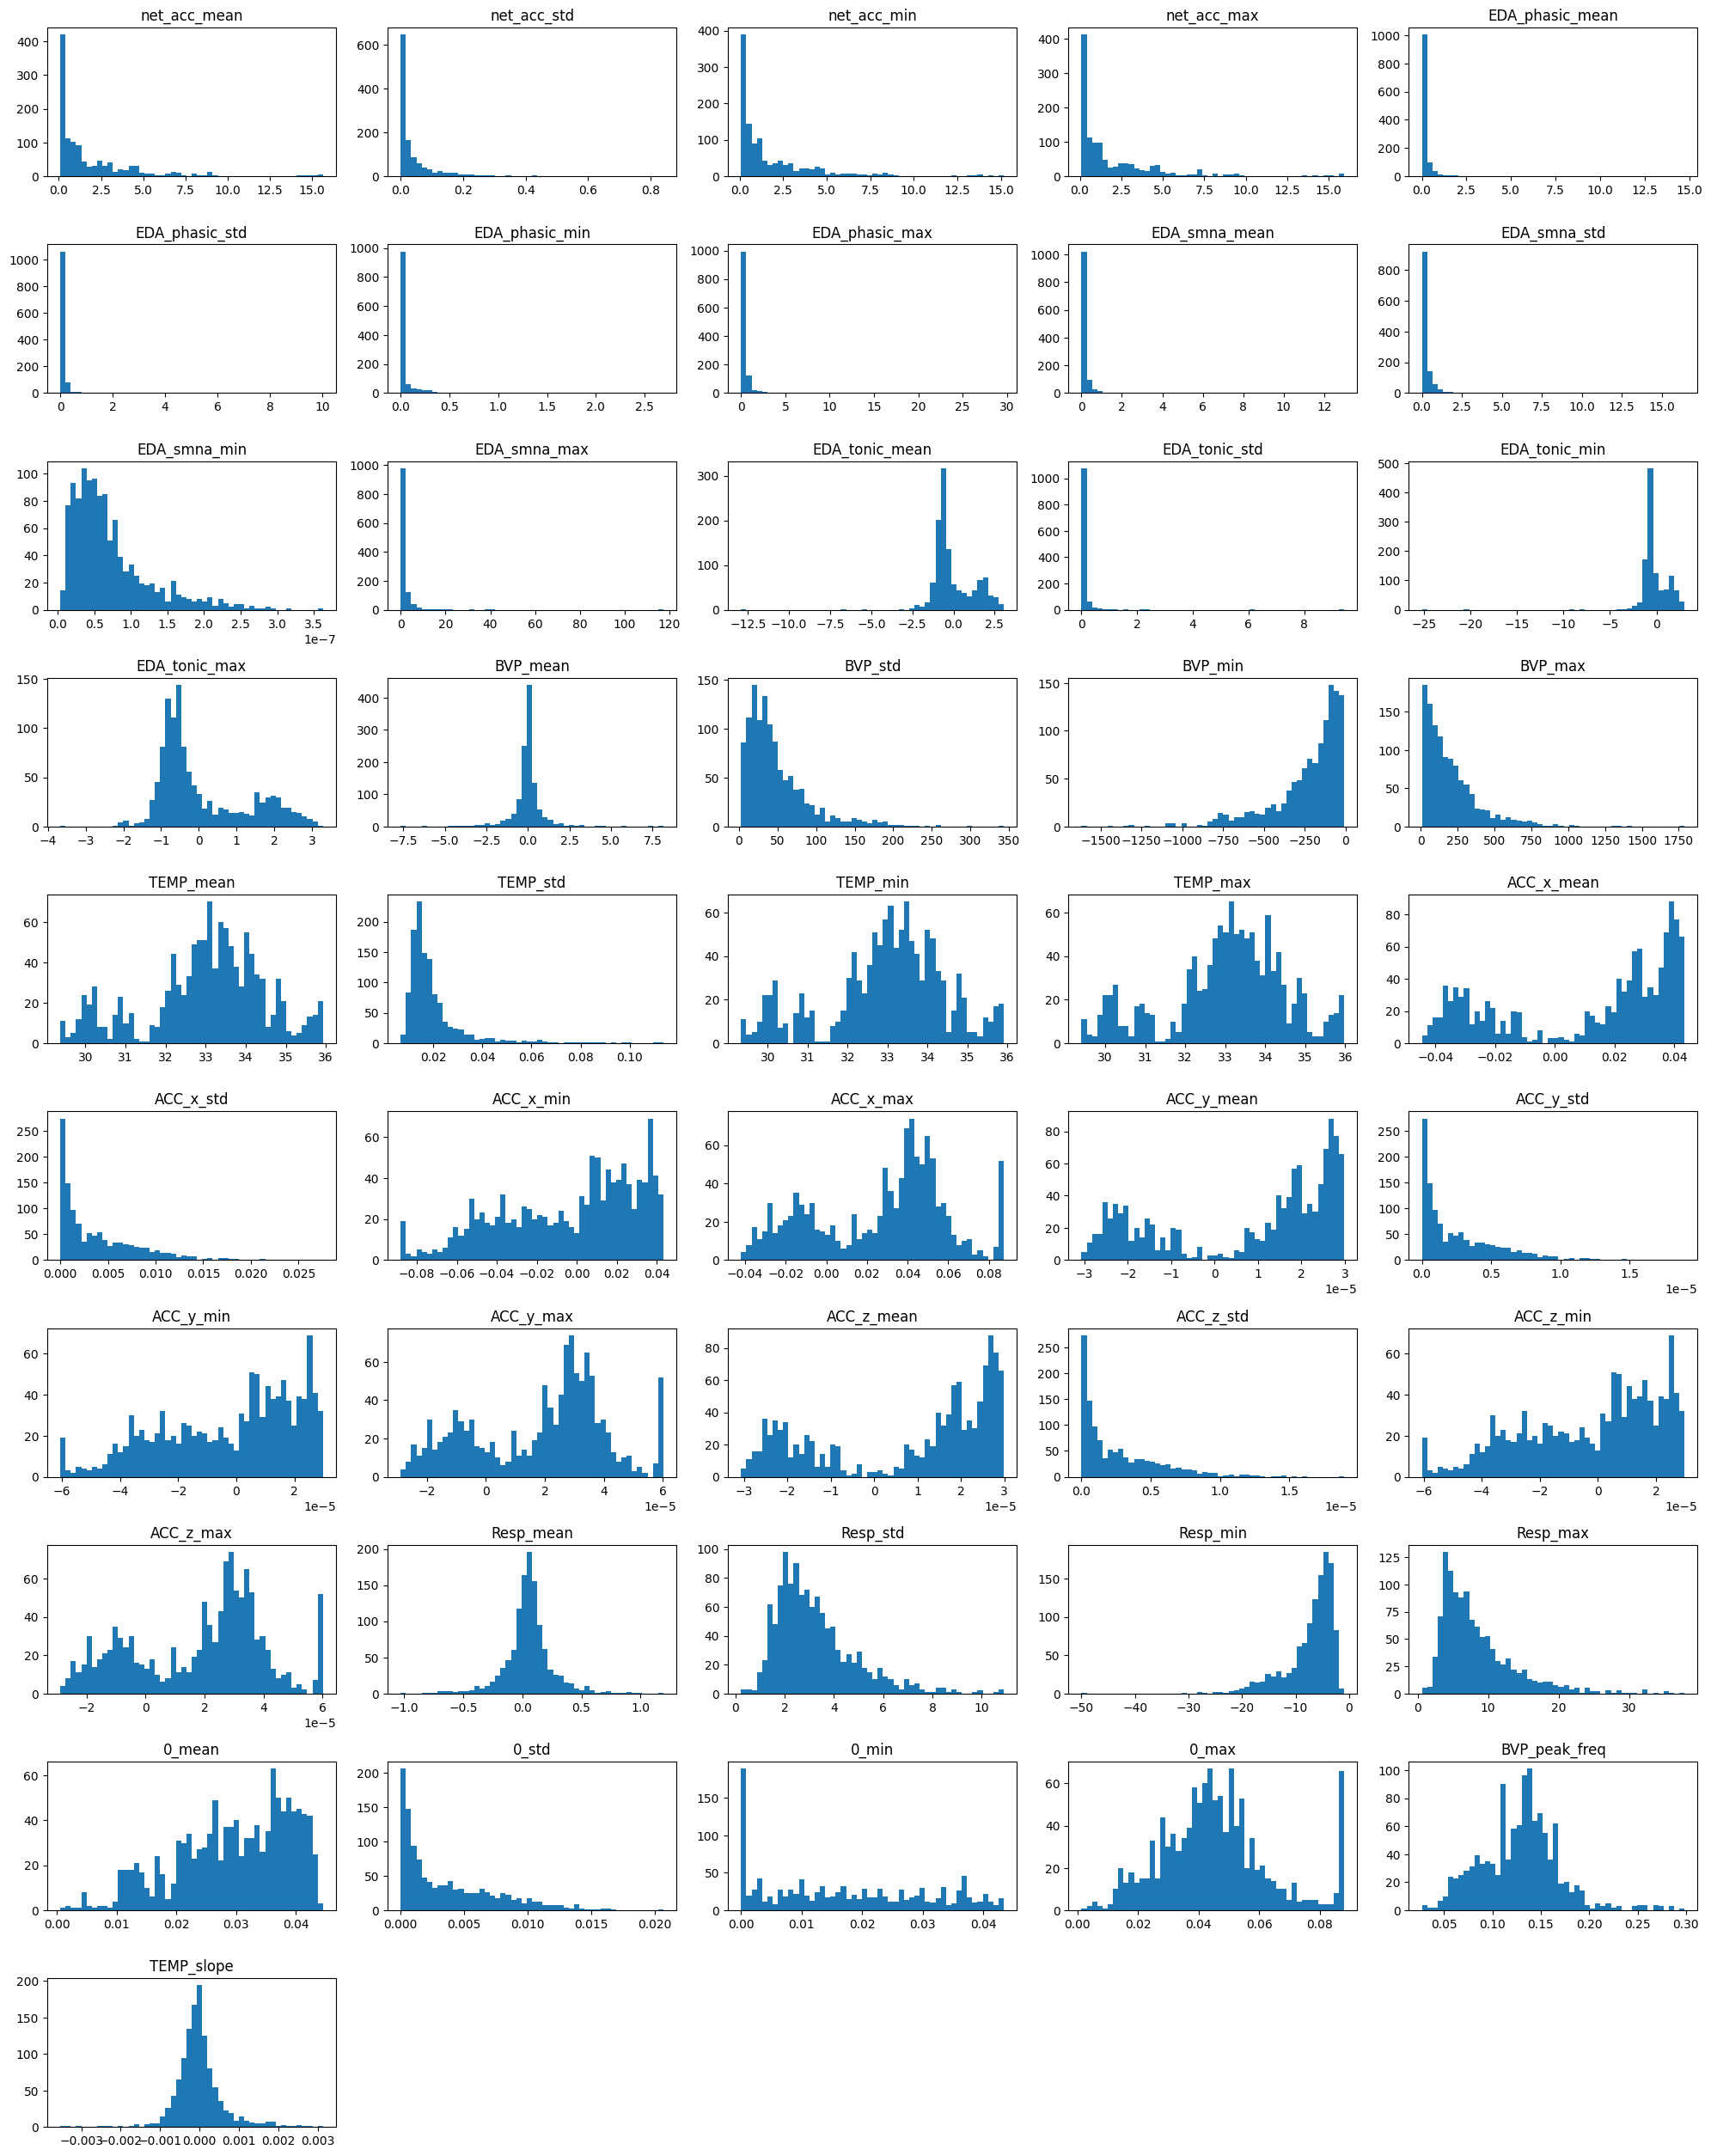

In [35]:
plot_distribution(data)

We can observe that the `net_acc`, `EDA_phasic` and `EDA_smna` features are very skewed to the left and there may be some outliers. Furthermore observing the acceleraton features we can observe that the readings from the three axis are very similar and it would be a good idea to explore it further. In order to get a better idea how the features correlate with each other we will plot a correlation matrix. Before we plot the matrix

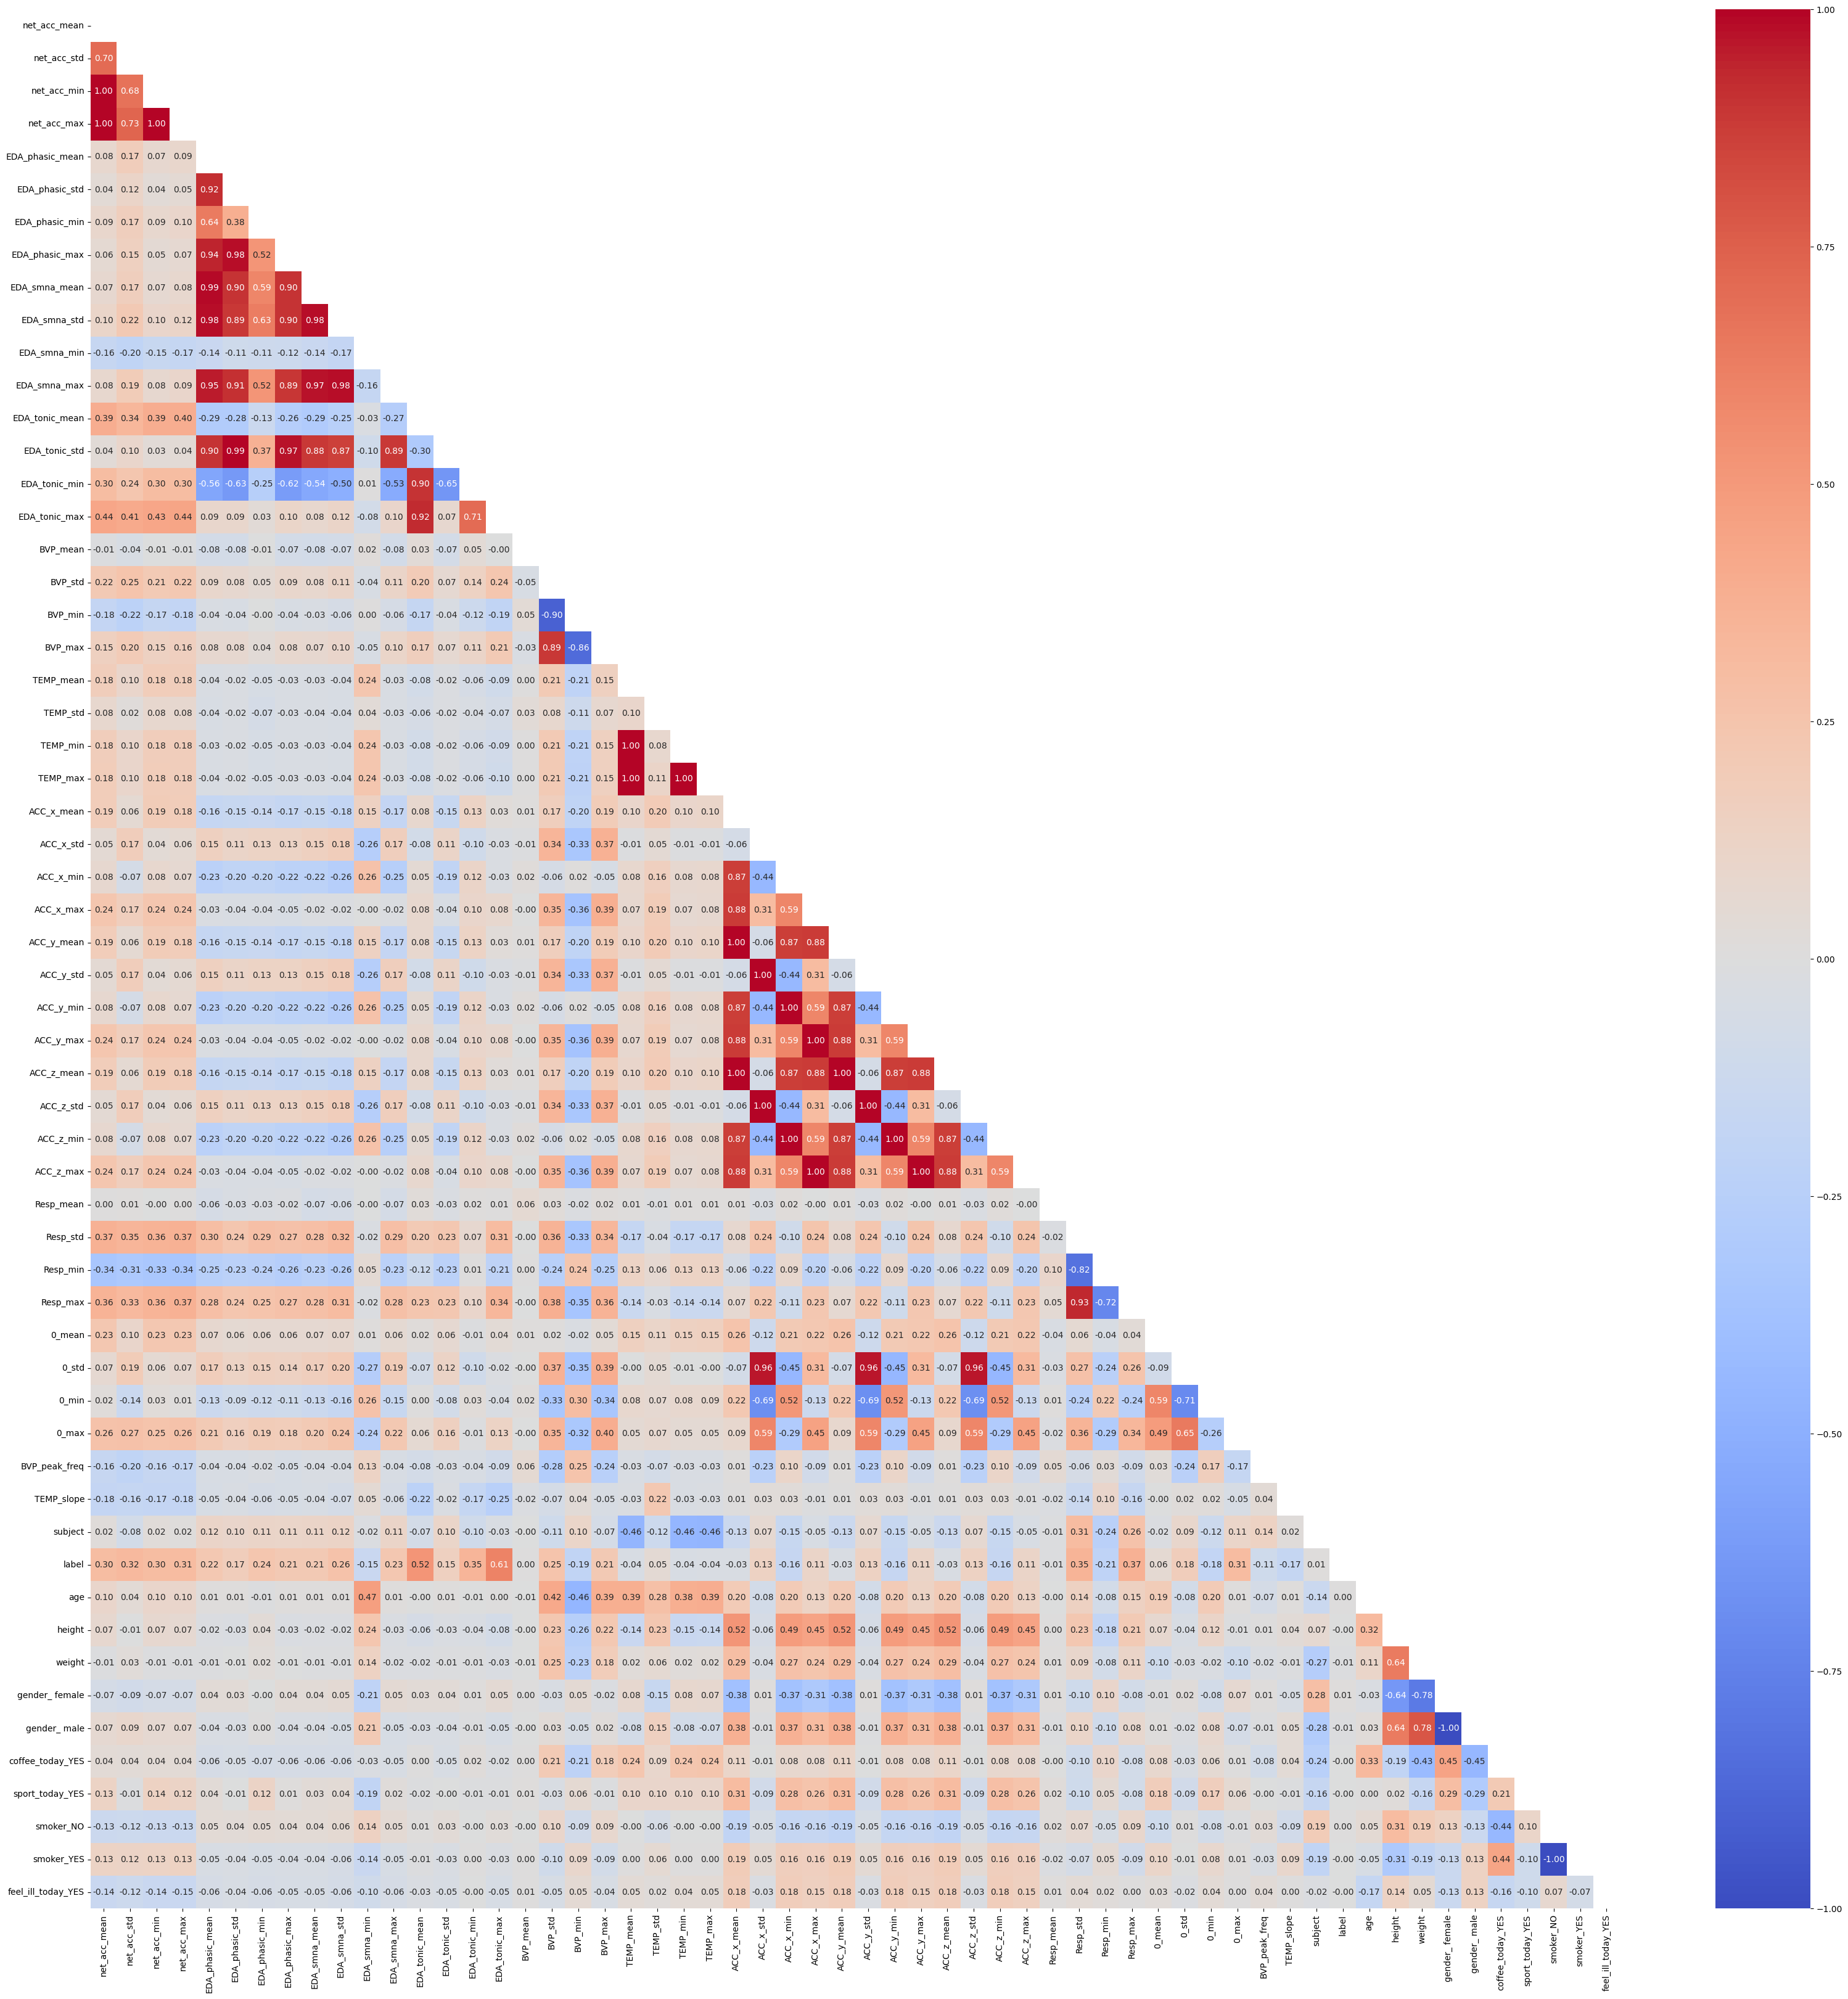

In [36]:
# plot a correlation matrix
corr = data.corr()
mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.show()

We can observe that some parts are more saturated than others, these spots indicate features with higher correlation to each other, thus we will explore them further. We will generally ignore high correlation between standard variation, minimum and maximum values as they are expected to be highly correlated. Keeping these factors in mind we can conclude that:
- All the EDA features are highly correlated to each other and the other variables, except for the `EDA_smna_min`
- The `net_acc` features are highly correlated to the other variables
- The `ACC` features are highly correlated to the other variables and we can confirm, our previous observation, that they are also highly correlated to each other.
- `BVP` and `RESP` have a very high correlation to  other features, with the exception of the mean of those features which have almost no correlation at all.
- `TEMP` min, max and mean features have a low correlation to the other variables and are incredibly similar to each other, thus they can be combined into one feature. On the other hand the standard deviation and the slope of the temperature have a very low coorelation score with the other variables, thus they can be removed.  

For the categorical features the only useful correlations are between the `age`, `height` and `weight` features and the physiological and motion features, thus we can safely remove the rest. Before we do that, it must be noted that there is an obvious correlation between `subject` and `TEMP` features, gender and acceleartion, sport and acceleration and of course between gender and height and weight.

    

    

Now we will remove the features that won't be of  use to us or overlap with other features. The columns in question are: `EDA_smna_min`, `BVP_mean`, `TEMP_std`, `TEMP_slope`, `RESP_mean`, `smoker_YES`, `smoker_NO`, `feel_ill_today_YES`, `sport_today_YES`, `coffee_today_YES`, `gender_male` and `gender_female`. Furthermore we will leave only the `TEMP_mean`feature and remove `TEMP_min` and `TEMP_max`, in adddition to merging all the acceleration features into one.

In [37]:
columns_to_remove = ['EDA_smna_min', 'BVP_mean', 'TEMP_std', 'TEMP_slope', 'Resp_mean', 'smoker_YES', 'smoker_NO', 'feel_ill_today_YES', 'sport_today_YES', 'coffee_today_YES', 'gender_ male', 'gender_ female', 'TEMP_min', 'TEMP_max']
data_m1 = data.drop(columns_to_remove, axis=1)
data_m1.head()

net_acc_mean  net_acc_std  net_acc_min  net_acc_max  EDA_phasic_mean  \
0      1.397968     0.141481     1.109299     1.678399         1.824289   
1      1.210132     0.091882     1.014138     1.485800         2.109146   
2      1.010977     0.102315     0.832216     1.190967         0.152828   
3      0.775187     0.046391     0.693996     0.876819         0.177595   
4      0.657494     0.034540     0.594667     0.718106         0.035014   

   EDA_phasic_std  EDA_phasic_min  EDA_phasic_max  EDA_smna_mean  \
0        1.088328        0.367977        4.319987       1.284376   
1        1.223528        0.539150        4.459367       1.467865   
2        0.128896        0.006950        0.544346       0.105091   
3        0.126167        0.002789        0.361388       0.110786   
4        0.039616        0.001144        0.132781       0.026716   

   EDA_smna_std  EDA_smna_max  EDA_tonic_mean  EDA_tonic_std  EDA_tonic_min  \
0      1.952823     11.712596        1.232164       0.997487      -0.599164   
1      2.852510     17.418821        0.377615       1.172221      -1.213173   
2      0.244891      1.300810        1.727696       0.293389       1.137304   
3      0.199704      1.105898        0.987927       0.042388       0.912441   
4      0.114738      0.997037        0.772262       0.077628       0.615685   

   EDA_tonic_max     BVP_std  BVP_min  BVP_max  TEMP_mean  ACC_x_mean  \
0       2.554750  107.648359  -358.13   554.77  35.817091    0.029510   
1       1.871490  118.742089  -392.28   438.16  35.797568    0.017352   
2       2.037179   42.190039  -240.61   209.89  35.712909    0.020839   
3       1.127602   41.606872  -289.26   145.36  35.700811    0.034449   
4       0.907833   43.121633  -197.37   194.12  35.744727    0.028870   

   ACC_x_std  ACC_x_min  ACC_x_max  ACC_y_mean  ACC_y_std  ACC_y_min  \
0   0.011145  -0.024082   0.087383    0.000020   0.000008  -0.000017   
1   0.020817  -0.037843   0.071558    0.000012   0.000014  -0.000026   
2   0.011034   0.002752   0.054356    0.000014   0.000008   0.000002   
3   0.003185   0.013761   0.040595    0.000024   0.000002   0.000009   
4   0.004379   0.013761   0.038531    0.000020   0.000003   0.000009   

   ACC_y_max  ACC_z_mean  ACC_z_std  ACC_z_min  ACC_z_max  Resp_std  Resp_min  \
0   0.000060    0.000020   0.000008  -0.000017   0.000060  2.935617 -8.805847   
1   0.000049    0.000012   0.000014  -0.000026   0.000049  2.843123 -8.168030   
2   0.000037    0.000014   0.000008   0.000002   0.000037  1.700333 -2.914429   
3   0.000028    0.000024   0.000002   0.000009   0.000028  1.483260 -2.818298   
4   0.000027    0.000020   0.000003   0.000009   0.000027  1.501585 -3.242493   

   Resp_max    0_mean     0_std     0_min     0_max  BVP_peak_freq  subject  \
0  6.504822  0.029937  0.009942  0.000000  0.087383       0.135670        2   
1  6.742859  0.021986  0.015845  0.000000  0.071558       0.095023        2   
2  3.260803  0.020839  0.011034  0.002752  0.054356       0.076880        2   
3  3.730774  0.034449  0.003185  0.013761  0.040595       0.140271        2   
4  2.912903  0.028870  0.004379  0.013761  0.038531       0.149321        2   

   label  age  height  weight  
0      1   27     175      80  
1      1   27     175      80  
2      1   27     175      80  
3      1   27     175      80  
4      1   27     175      80

In order to decide what to do with the acceleration values will again make a correlation matrix, but this time only for the acceleration features.

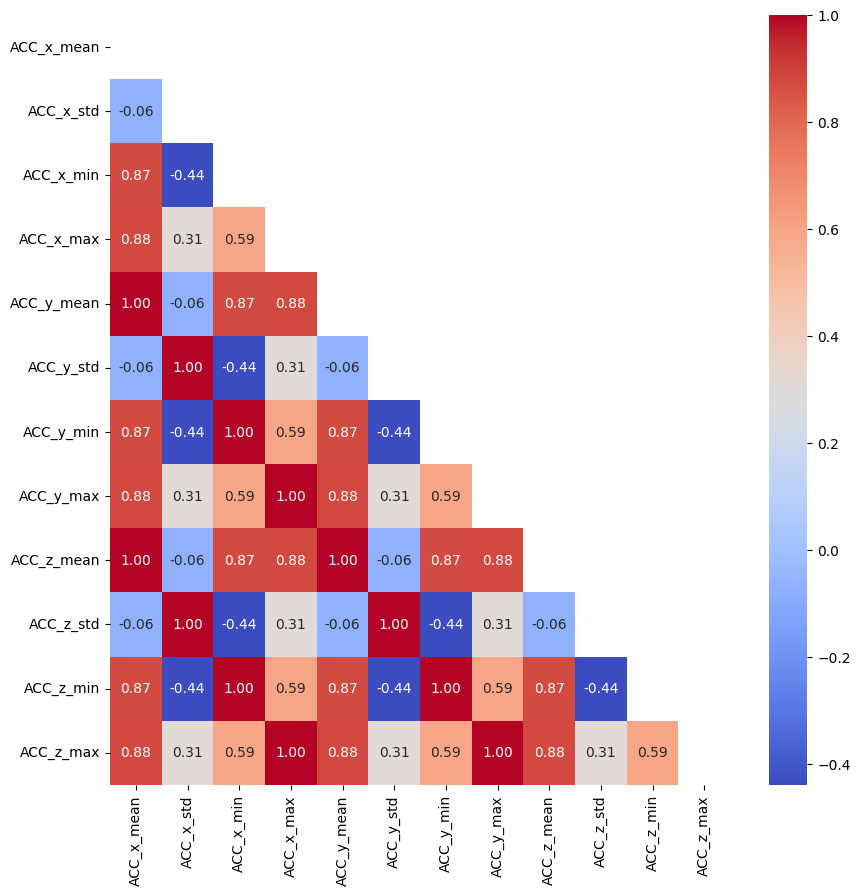

In [38]:
corr = data_m1.loc[:, 'ACC_x_mean':'ACC_z_max'].corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.show()

As we can see th columns are highly correlated to each other, thus we will merge the `ACC_x`, `ACC_y` and `ACC_z` features into `ACC_mean_mean`, `ACC_mean_std`, `ACC_mean_min`, `ACC_mean_max`.

In [39]:
# combine the ACC features for the three axis into one feature
data_m1['ACC_mean_mean'] = data_m1[['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean']].mean(axis=1)
data_m1['ACC_mean_std'] = data_m1[['ACC_x_std', 'ACC_y_std', 'ACC_z_std']].mean(axis=1)
data_m1['ACC_mean_min'] = data_m1[['ACC_x_min', 'ACC_y_min', 'ACC_z_min']].mean(axis=1)
data_m1['ACC_mean_max'] = data_m1[['ACC_x_max', 'ACC_y_max', 'ACC_z_max']].mean(axis=1)
data_m2 = data_m1.drop(['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'ACC_x_std', 'ACC_y_std', 'ACC_z_std', 'ACC_x_min', 'ACC_y_min', 'ACC_z_min', 'ACC_x_max', 'ACC_y_max', 'ACC_z_max'], axis=1)
data_m2.head()

net_acc_mean  net_acc_std  net_acc_min  net_acc_max  EDA_phasic_mean  \
0      1.397968     0.141481     1.109299     1.678399         1.824289   
1      1.210132     0.091882     1.014138     1.485800         2.109146   
2      1.010977     0.102315     0.832216     1.190967         0.152828   
3      0.775187     0.046391     0.693996     0.876819         0.177595   
4      0.657494     0.034540     0.594667     0.718106         0.035014   

   EDA_phasic_std  EDA_phasic_min  EDA_phasic_max  EDA_smna_mean  \
0        1.088328        0.367977        4.319987       1.284376   
1        1.223528        0.539150        4.459367       1.467865   
2        0.128896        0.006950        0.544346       0.105091   
3        0.126167        0.002789        0.361388       0.110786   
4        0.039616        0.001144        0.132781       0.026716   

   EDA_smna_std  EDA_smna_max  EDA_tonic_mean  EDA_tonic_std  EDA_tonic_min  \
0      1.952823     11.712596        1.232164       0.997487      -0.599164   
1      2.852510     17.418821        0.377615       1.172221      -1.213173   
2      0.244891      1.300810        1.727696       0.293389       1.137304   
3      0.199704      1.105898        0.987927       0.042388       0.912441   
4      0.114738      0.997037        0.772262       0.077628       0.615685   

   EDA_tonic_max     BVP_std  BVP_min  BVP_max  TEMP_mean  Resp_std  Resp_min  \
0       2.554750  107.648359  -358.13   554.77  35.817091  2.935617 -8.805847   
1       1.871490  118.742089  -392.28   438.16  35.797568  2.843123 -8.168030   
2       2.037179   42.190039  -240.61   209.89  35.712909  1.700333 -2.914429   
3       1.127602   41.606872  -289.26   145.36  35.700811  1.483260 -2.818298   
4       0.907833   43.121633  -197.37   194.12  35.744727  1.501585 -3.242493   

   Resp_max    0_mean     0_std     0_min     0_max  BVP_peak_freq  subject  \
0  6.504822  0.029937  0.009942  0.000000  0.087383       0.135670        2   
1  6.742859  0.021986  0.015845  0.000000  0.071558       0.095023        2   
2  3.260803  0.020839  0.011034  0.002752  0.054356       0.076880        2   
3  3.730774  0.034449  0.003185  0.013761  0.040595       0.140271        2   
4  2.912903  0.028870  0.004379  0.013761  0.038531       0.149321        2   

   label  age  height  weight  ACC_mean_mean  ACC_mean_std  ACC_mean_min  \
0      1   27     175      80       0.009850      0.003720     -0.008038   
1      1   27     175      80       0.005792      0.006949     -0.012632   
2      1   27     175      80       0.006956      0.003683      0.000919   
3      1   27     175      80       0.011499      0.001063      0.004593   
4      1   27     175      80       0.009637      0.001462      0.004593   

   ACC_mean_max  
0      0.029168  
1      0.023885  
2      0.018144  
3      0.013550  
4      0.012861

!!!!!!!!!!!!!!!!!!!! REMOVE OR REVISIT !!!!!!!!!!!!!!!!!!!!!!!  
We will also temporarily remove the `0_mean`, `0_std`, `0_min` and `EDA_max` features as they do not make any sense.

In [40]:
data_m2 = data_m2.drop(['0_mean', '0_std', '0_min', '0_max'], axis=1)

Now we will plot the correlation of the features to the target variable.

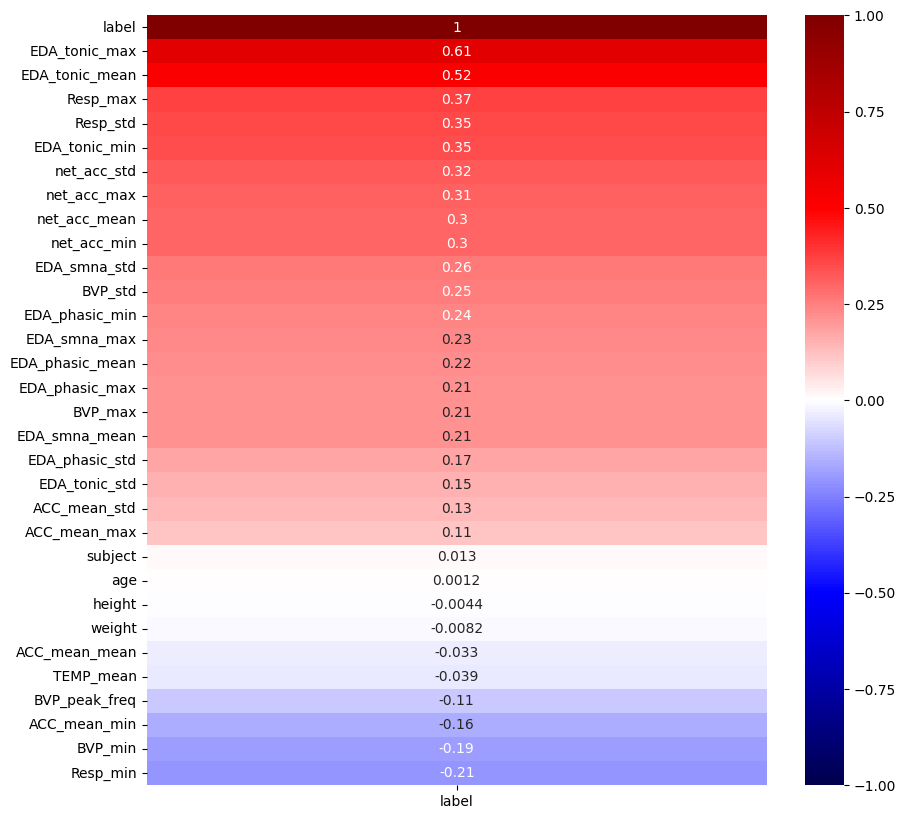

In [41]:
corr = data_m2.corr()
corr = pd.DataFrame(corr.iloc[24]).sort_values("label", ascending=False)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="seismic", annot=True, ax=ax)
plt.show()

From the graph above we can conclude that the feature that have the highest correlation to the target vriable are `EDA_tonic`, `Resp`, `net_acc`, `EDA_smna` and `BVP`.

In [42]:
data_m2.label.unique()

array([1, 2, 0], dtype=int64)

We can see that there are three unique values in the `label` column, according to the [WESAD data preparation repository](https://github.com/WJMatthew/WESAD/blob/master/data_wrangling.py) these values represent the following stress levels:
- 0 - Amusement
- 1 - Baseline
- 2 - Stress

Now we will separate the data by each label and observe how the features are affected by different stress levels.

In [43]:
amusement_data = data_m2[data_m2['label'] == 0].reset_index(drop=True)
baseline_data = data_m2[data_m2['label'] == 1].reset_index(drop=True)
stress_data = data_m2[data_m2['label'] == 2].reset_index(drop=True)

In [44]:
def plot_data_per_label(data, feature, labels=['amusement', 'baseline', 'stress']):	
    plt.figure(figsize=(20, 6))
    plt.title(f"{feature} variance per label")
    plt.xlabel("N records (30 second window)")
    plt.ylabel("{feature} measurement")

    for d in data:
        plt.plot(d[feature])

    plt.legend(labels, loc='upper right')
    plt.show()

The features that we will plot will be the same as the ones that we used to plot the correlation to the target variable, except the `subject`, `age`, `height` and `weight` as they had a very low correlation to the label, thus we won't observe any meaningful difference in the plots.

In [45]:
features = data_m2.columns.drop(['label', 'subject', 'age', 'height', 'weight'])
features

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'EDA_phasic_mean', 'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max',
       'EDA_smna_mean', 'EDA_smna_std', 'EDA_smna_max', 'EDA_tonic_mean',
       'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max', 'BVP_std', 'BVP_min',
       'BVP_max', 'TEMP_mean', 'Resp_std', 'Resp_min', 'Resp_max',
       'BVP_peak_freq', 'ACC_mean_mean', 'ACC_mean_std', 'ACC_mean_min',
       'ACC_mean_max'],
      dtype='object')

We can see that the categorical values have been successfully removed, thus we will proceed to plot the efect of the stress level on the features.

In [46]:
%%jmd
# Feature variance per label
[//]: # (-.- .tabset .tabset-pills .tabset-fade)

# Feature variance per label
<span class='pj-token' style='display: none;'>.tabset|O_O|.tabset-pills|O_O|.tabset-fade</span>

In [47]:
from scipy.interpolate import make_interp_spline

# required inputs: data - a list of dataframes that correspond to the data for each label, feature - the feature to plot, labels - the labels for the data
def plot_smooth_data_per_label(data, feature, labels=['amusement', 'baseline', 'stress'], num=100, b_spline_degree=3):
    plt.figure(figsize=(20, 6))
    plt.title(f"{feature} variance per label")
    plt.xlabel("N records (30 second window)")
    plt.ylabel(f"{feature} measurement")

    # loop through the data for each srtress level, smooth it and plot it
    for d in data:
        xnew = np.linspace(d[feature].index.min(), d[feature].index.max(), num)
        spl = make_interp_spline(d[feature].index, d[feature], k=b_spline_degree)
        power_smooth = spl(xnew)
        plt.plot(xnew, power_smooth)

    plt.legend(labels, loc='upper right')
    #plt.show()
    return plt.gcf()

In [48]:
stress_level_data = [amusement_data, baseline_data, stress_data]
#for f in features:
#    plot_smooth_data_per_label(stress_level_data, f, num=50, b_spline_degree=2)

## net_acc_mean

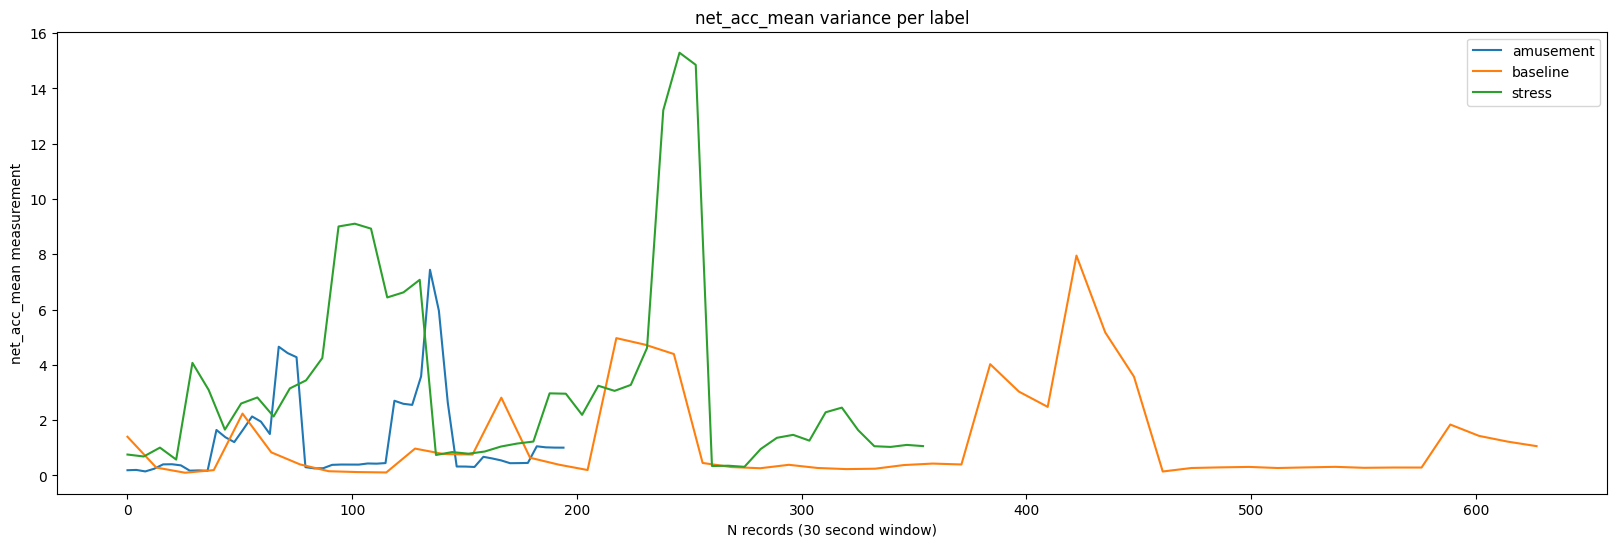

## net_acc_std

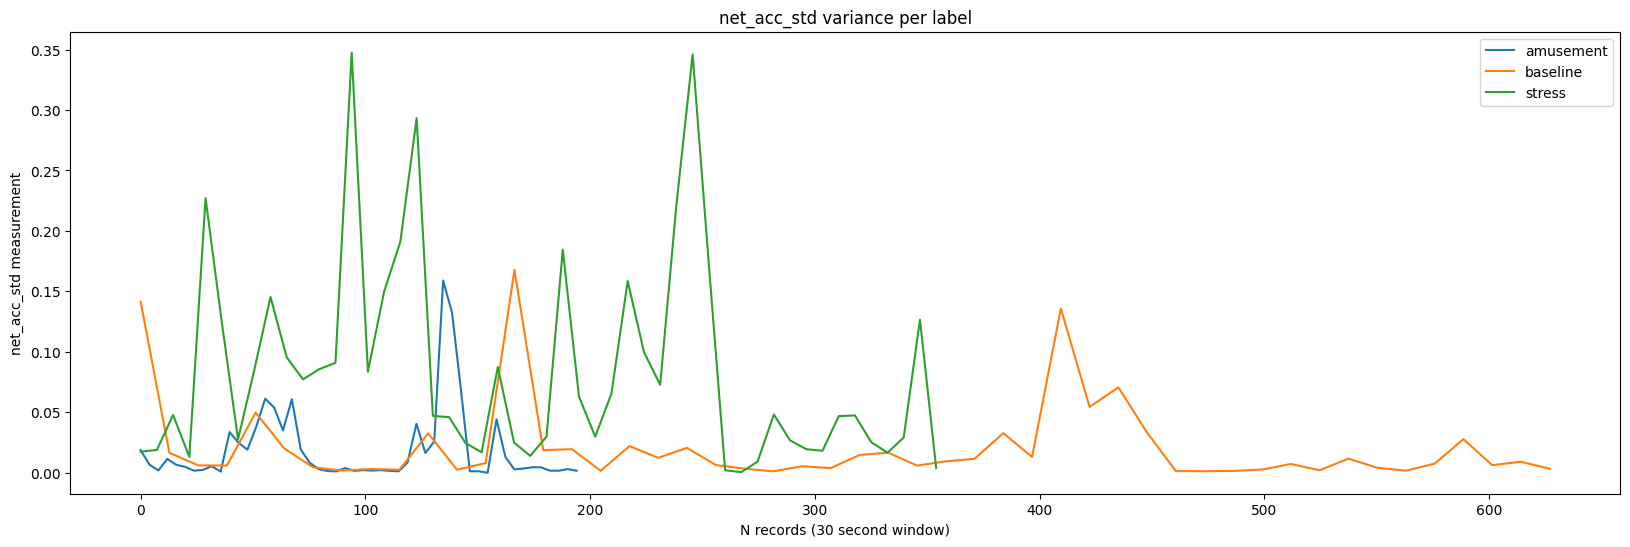

## net_acc_min

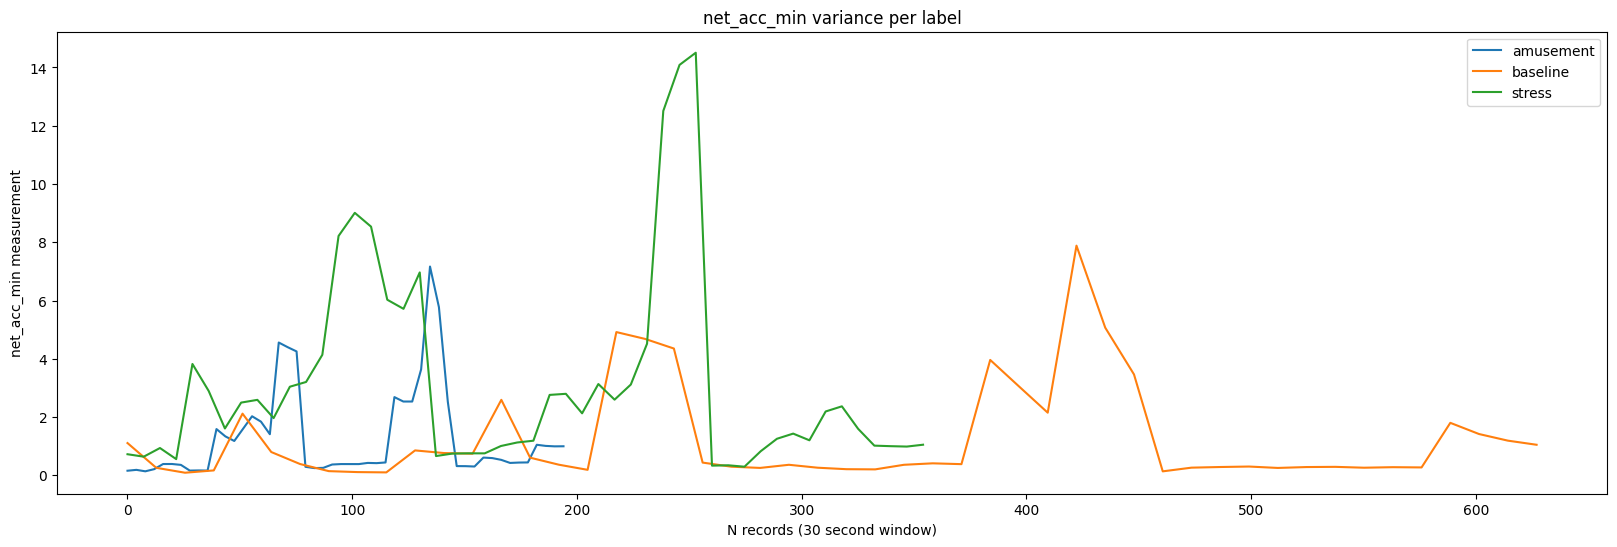

## net_acc_max

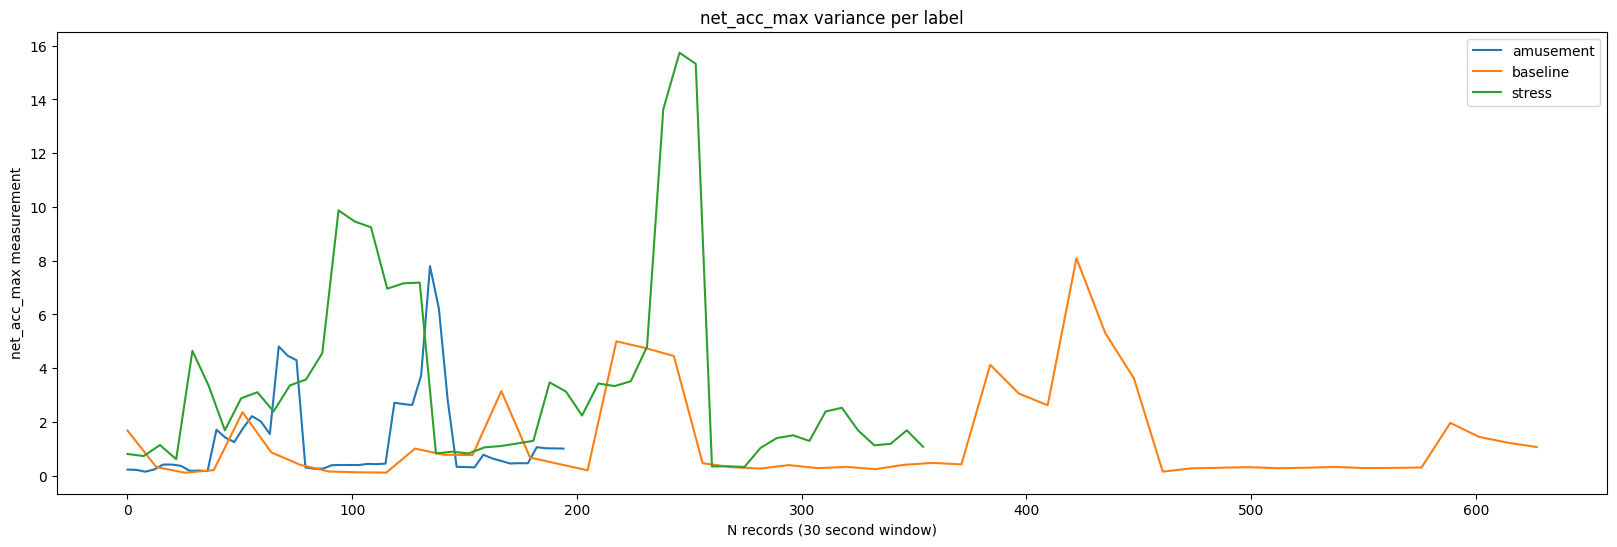

## EDA_phasic_mean

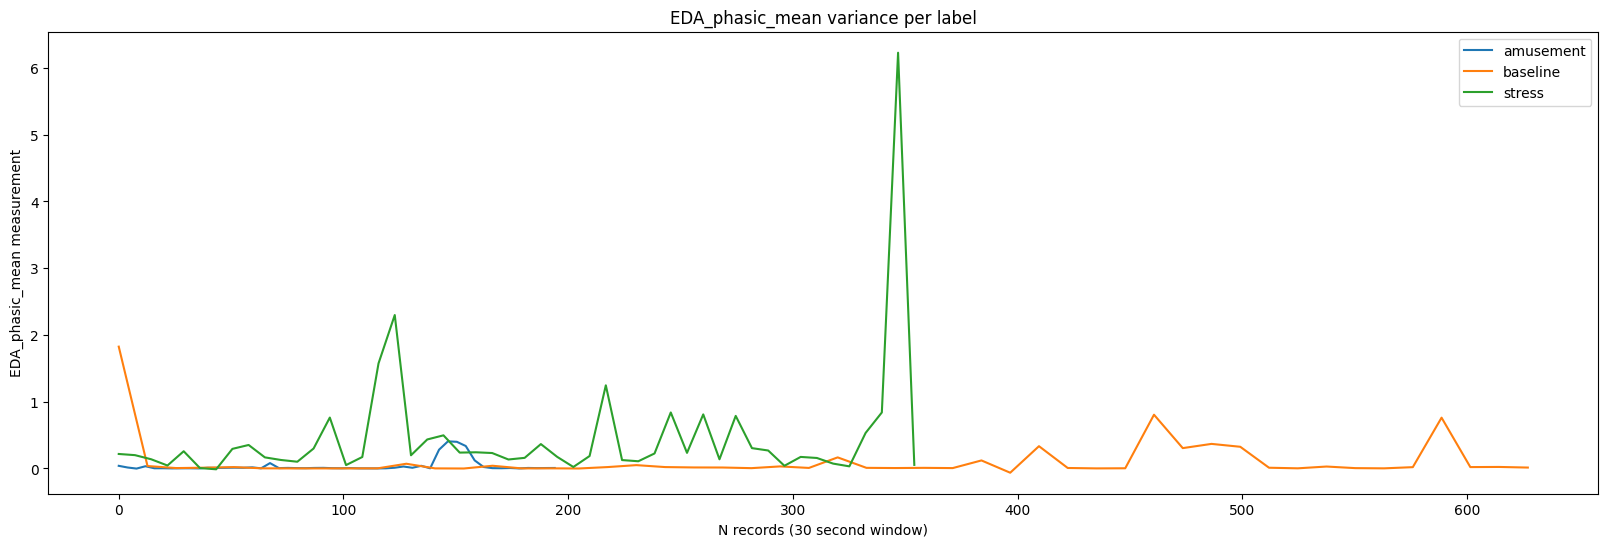

## EDA_phasic_std

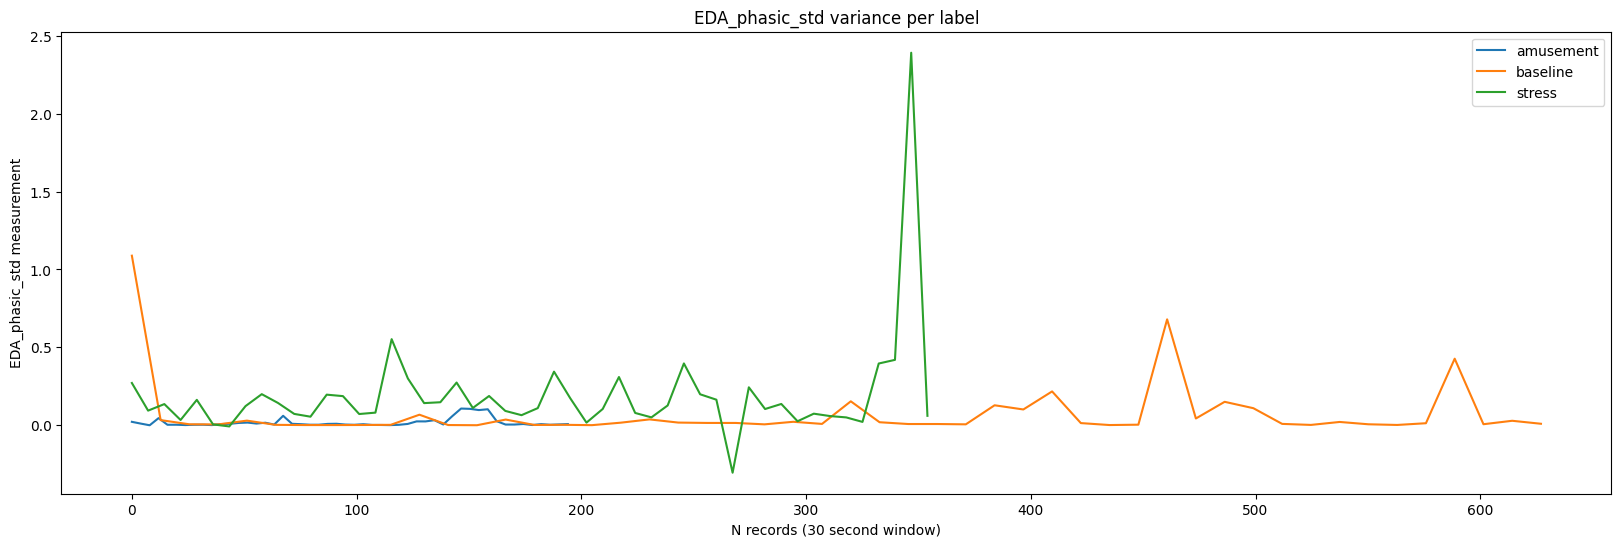

## EDA_phasic_min

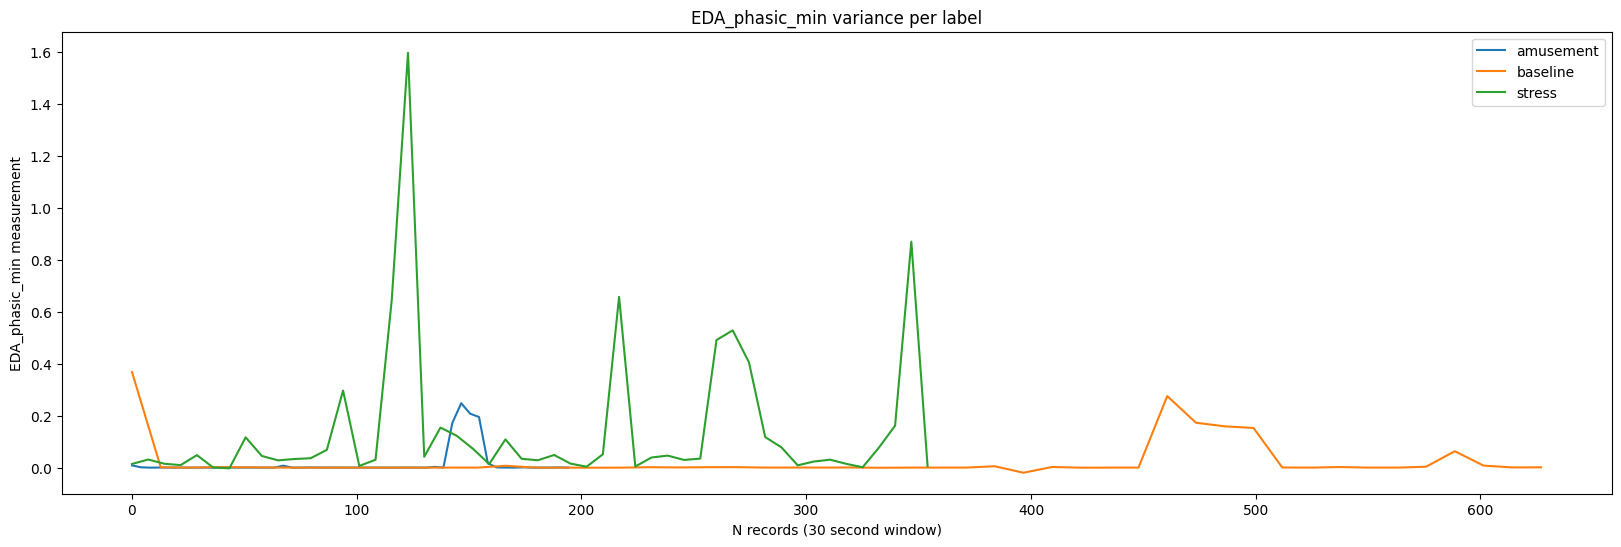

## EDA_phasic_max

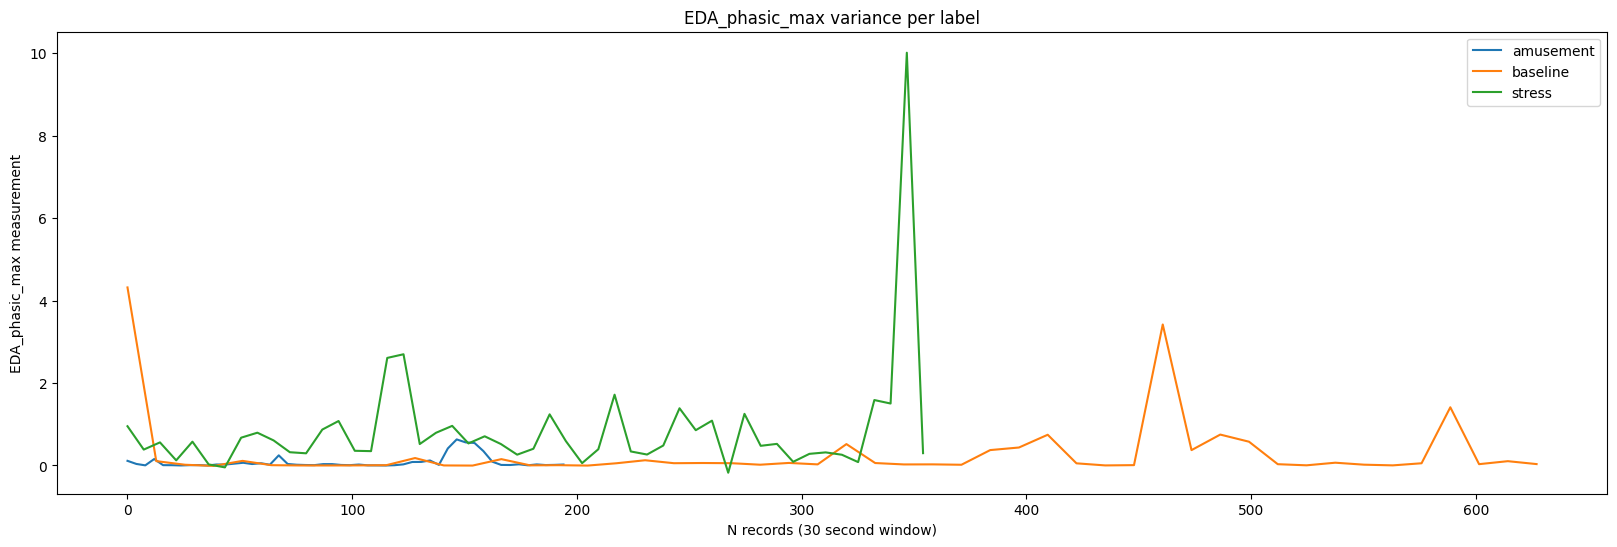

## EDA_smna_mean

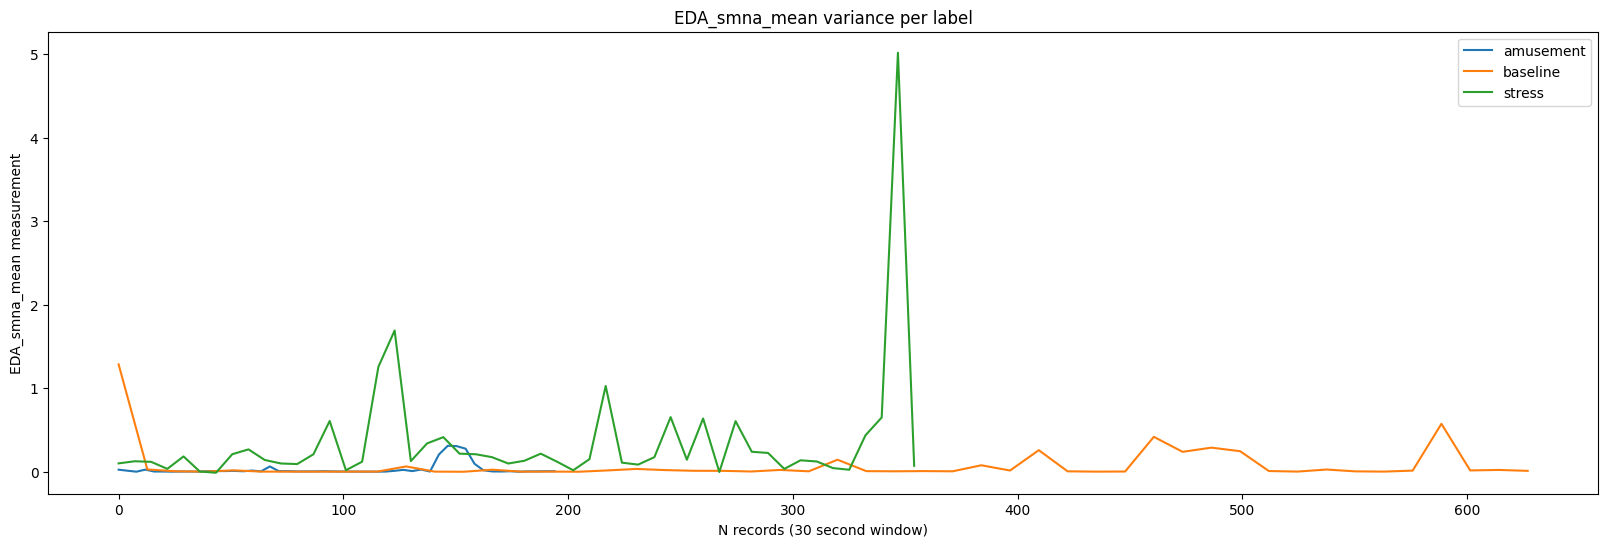

## EDA_smna_std

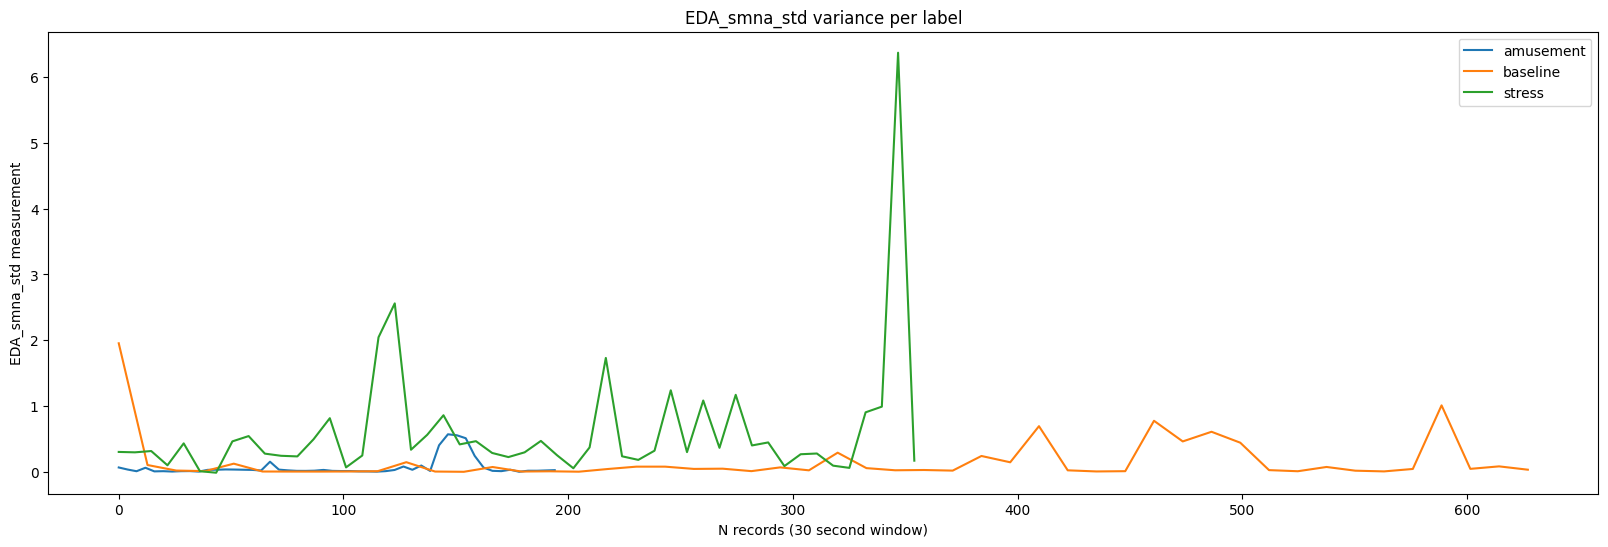

## EDA_smna_max

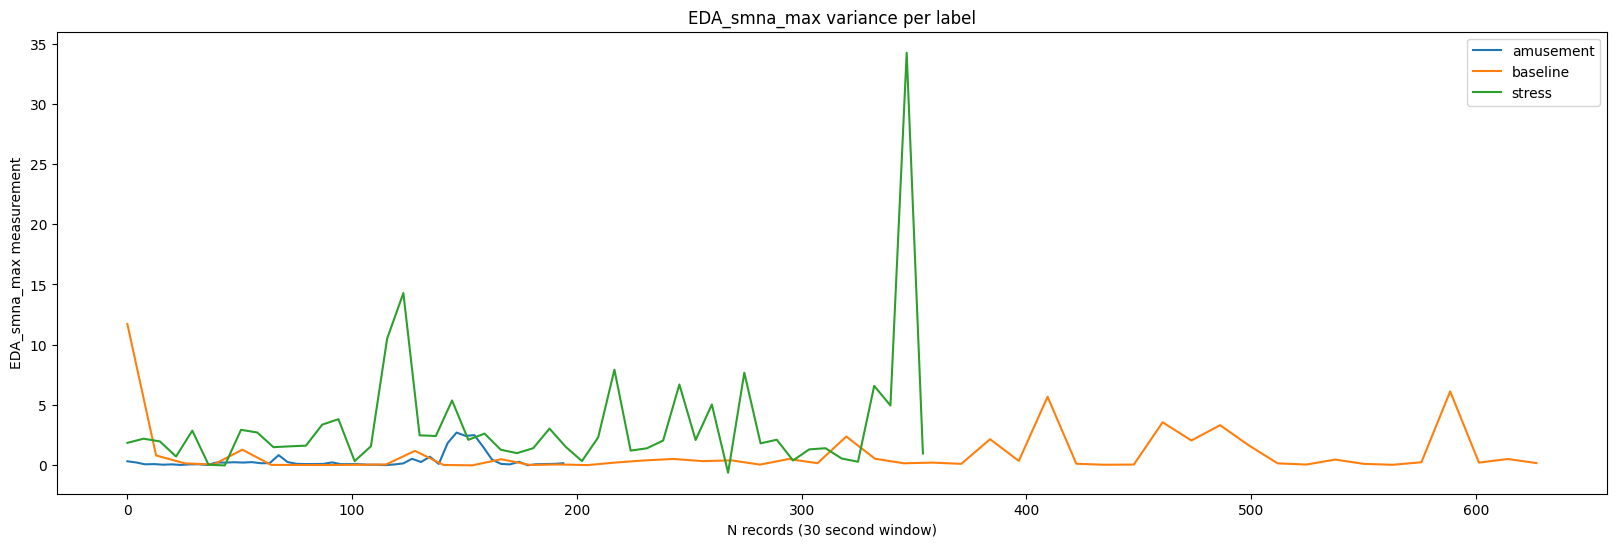

## EDA_tonic_mean

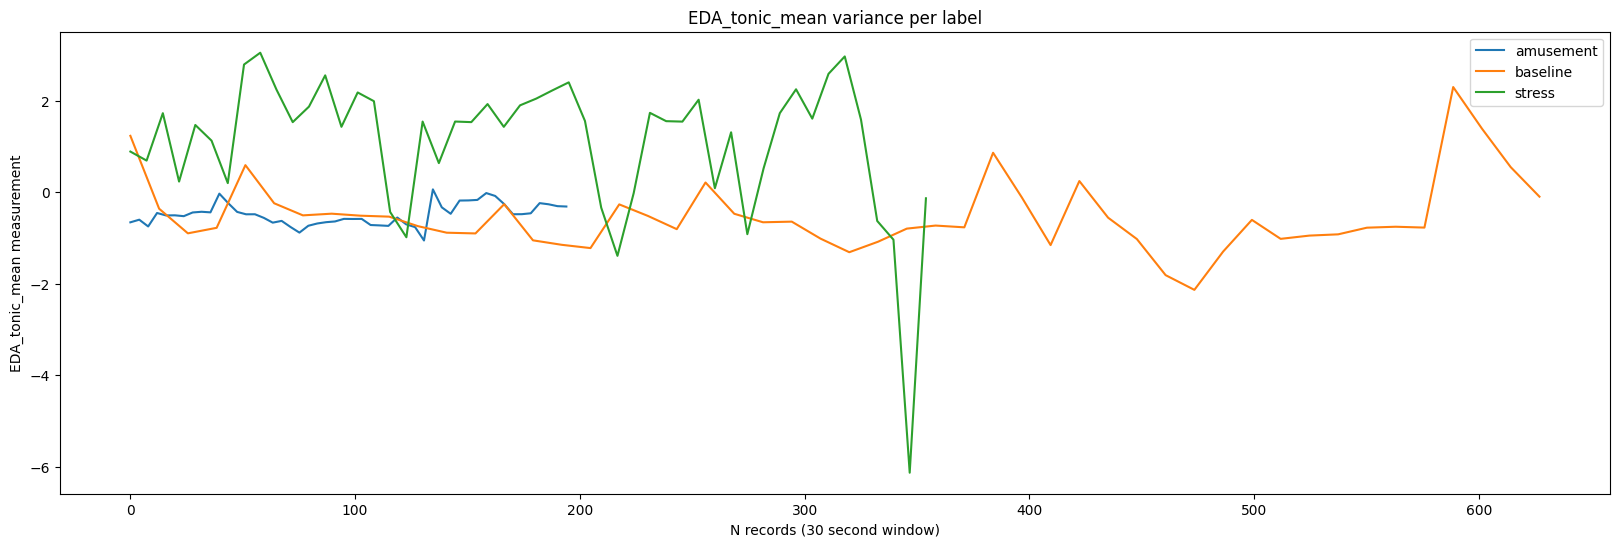

## EDA_tonic_std

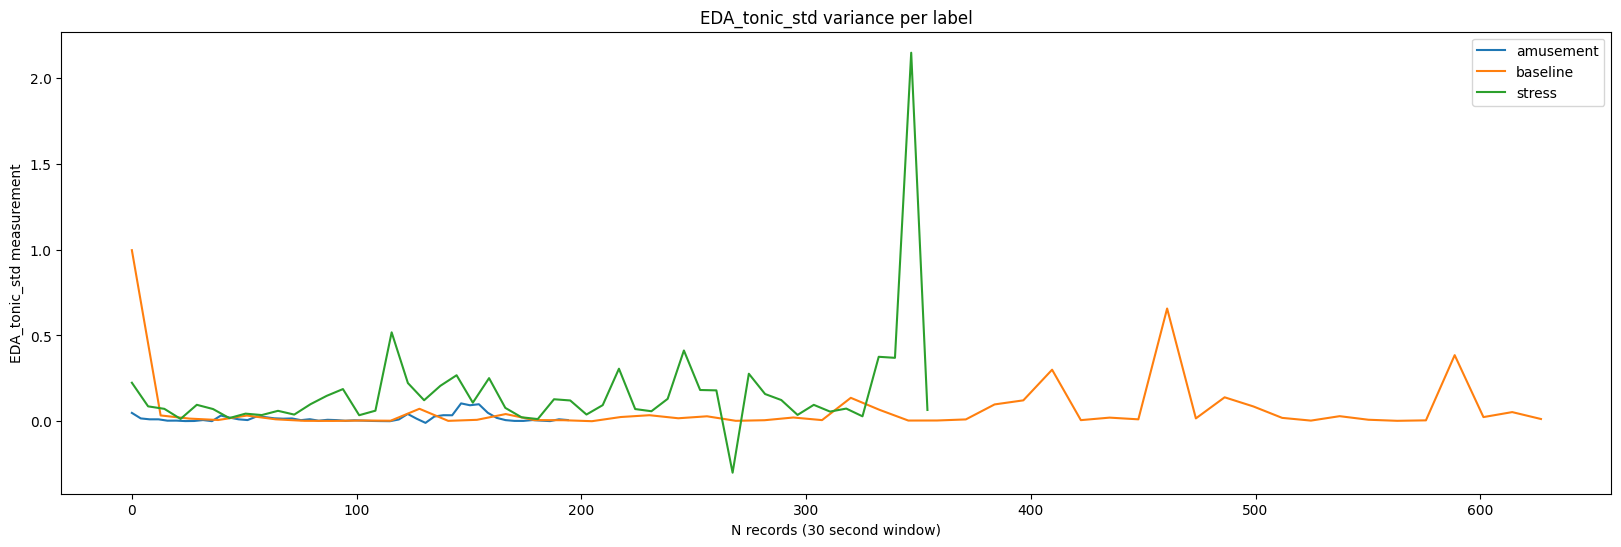

## EDA_tonic_min

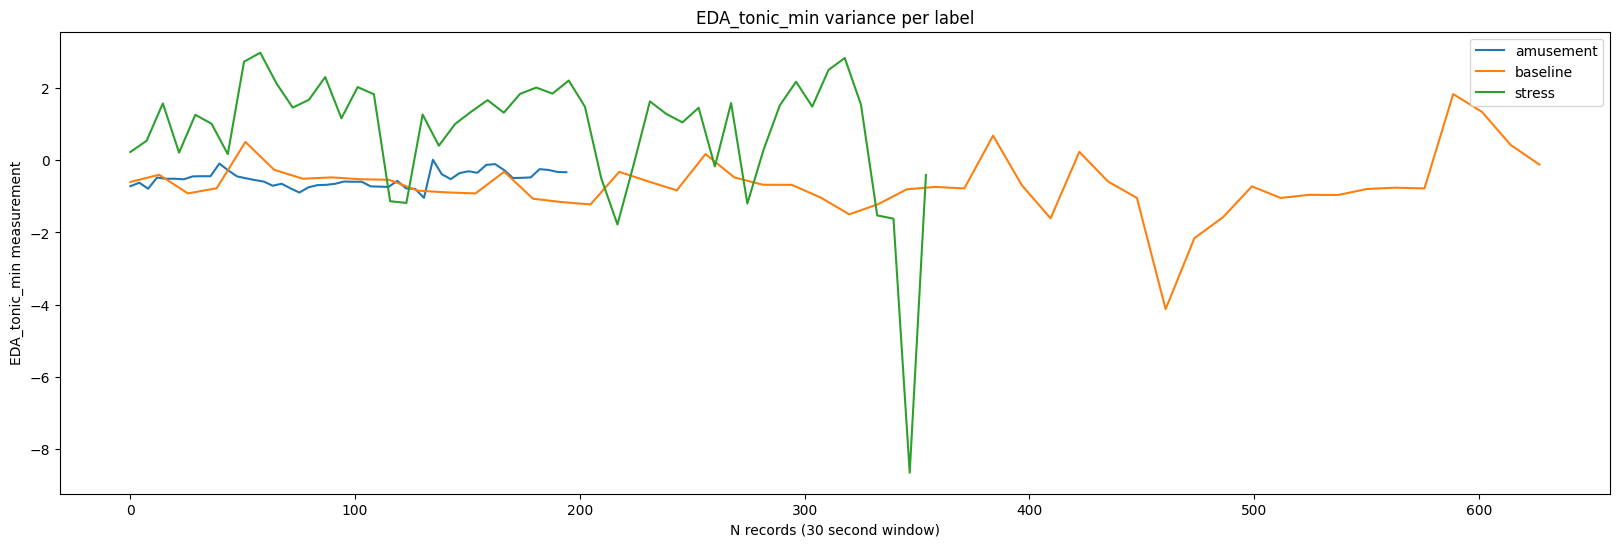

## EDA_tonic_max

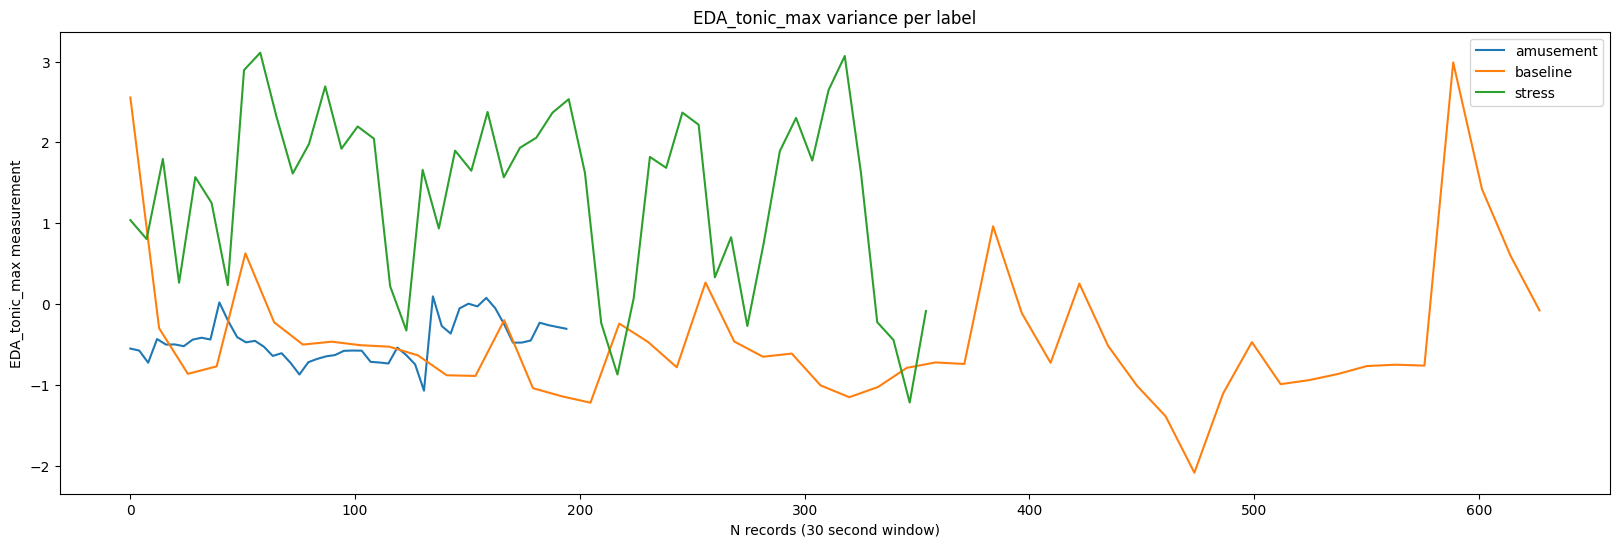

## BVP_std

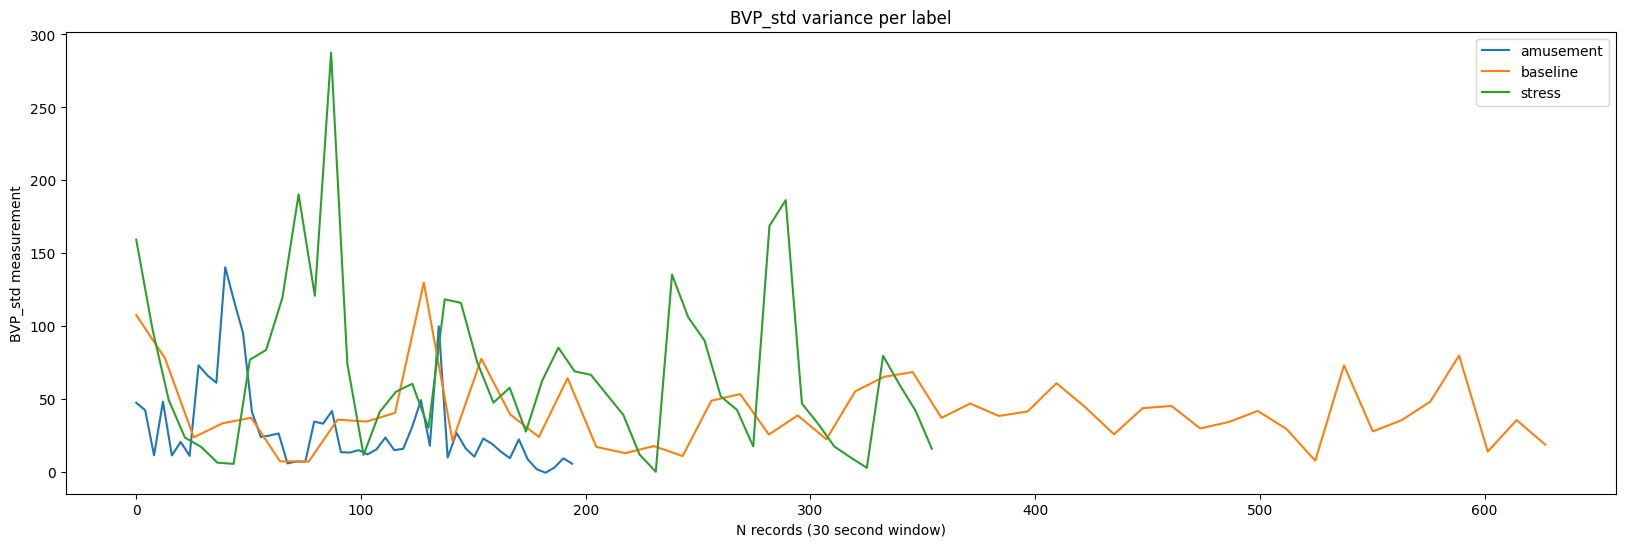

## BVP_min

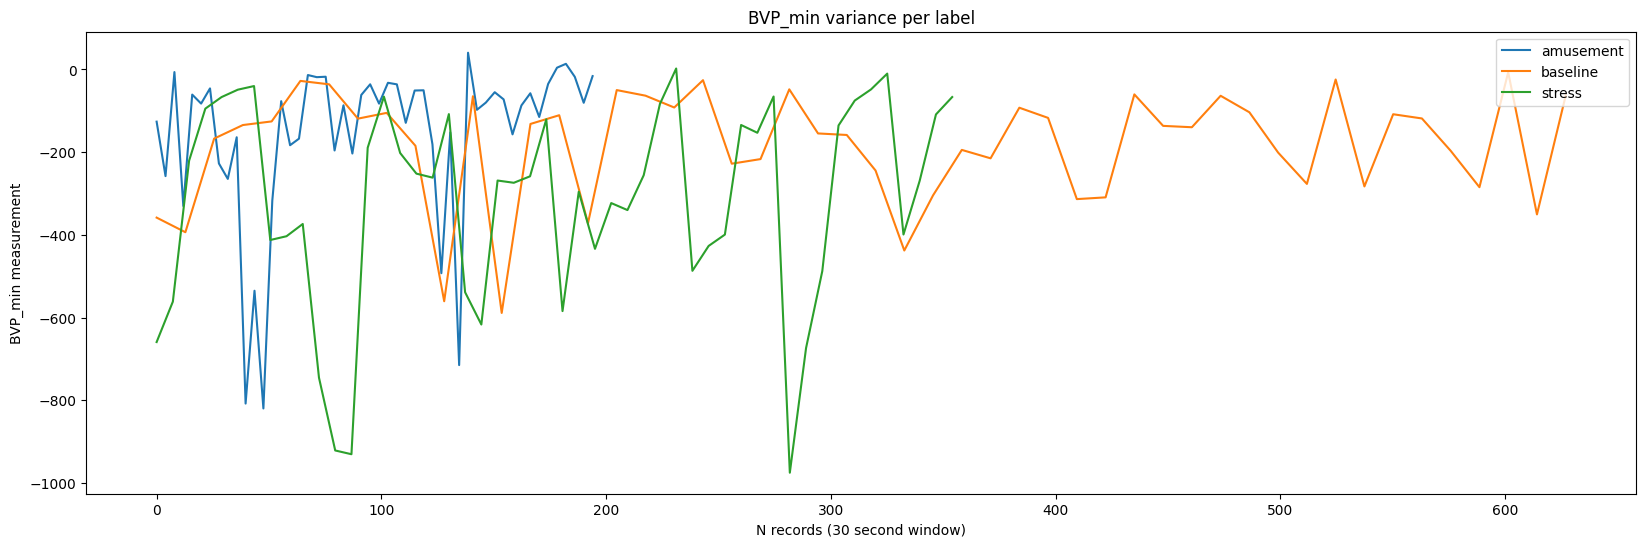

## BVP_max

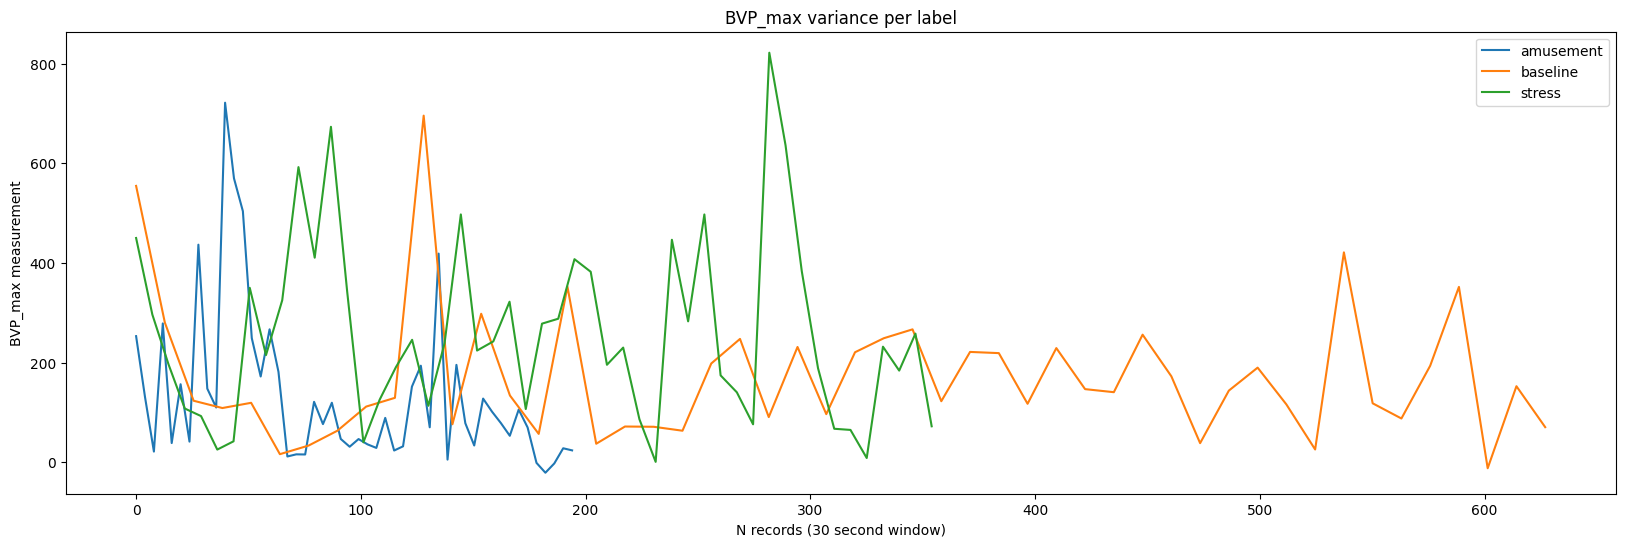

## TEMP_mean

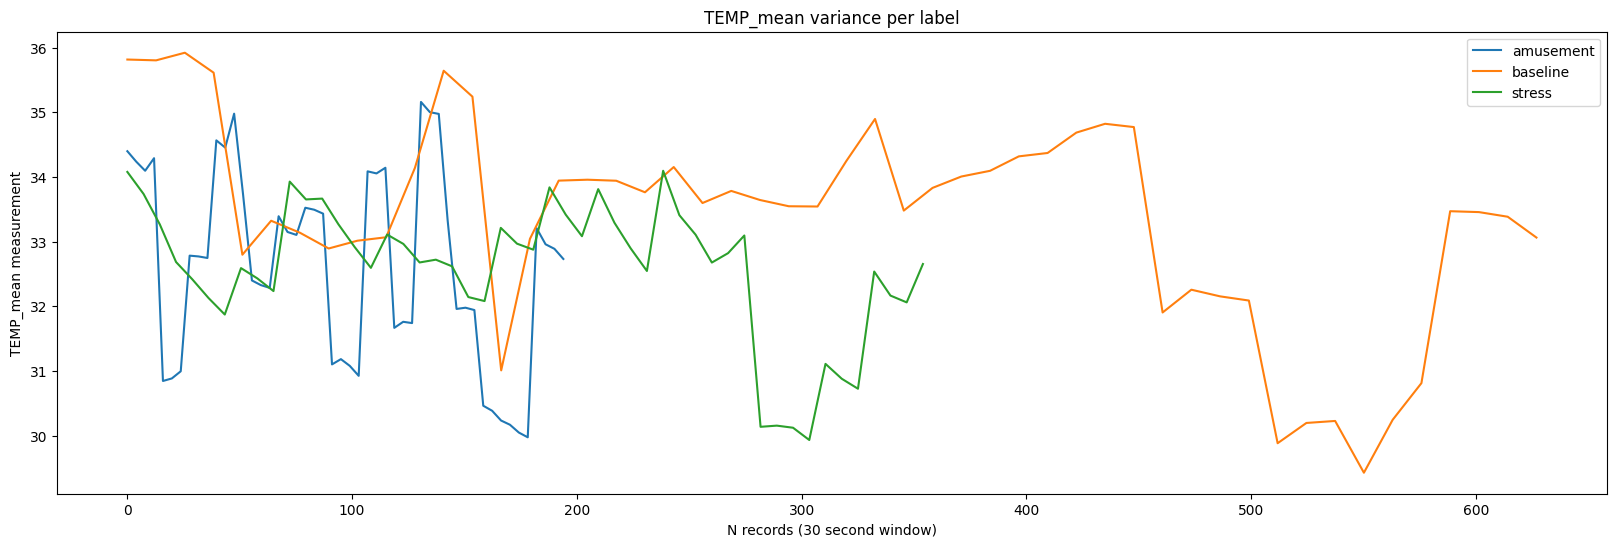

## Resp_std

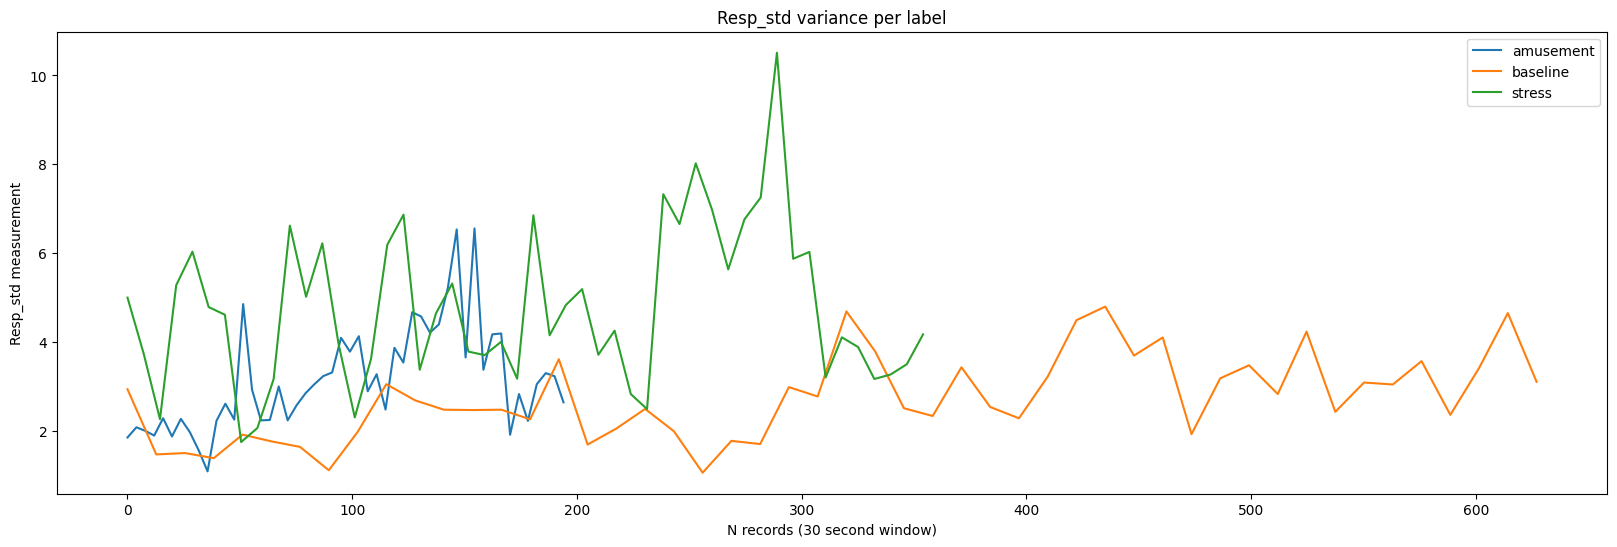

## Resp_min

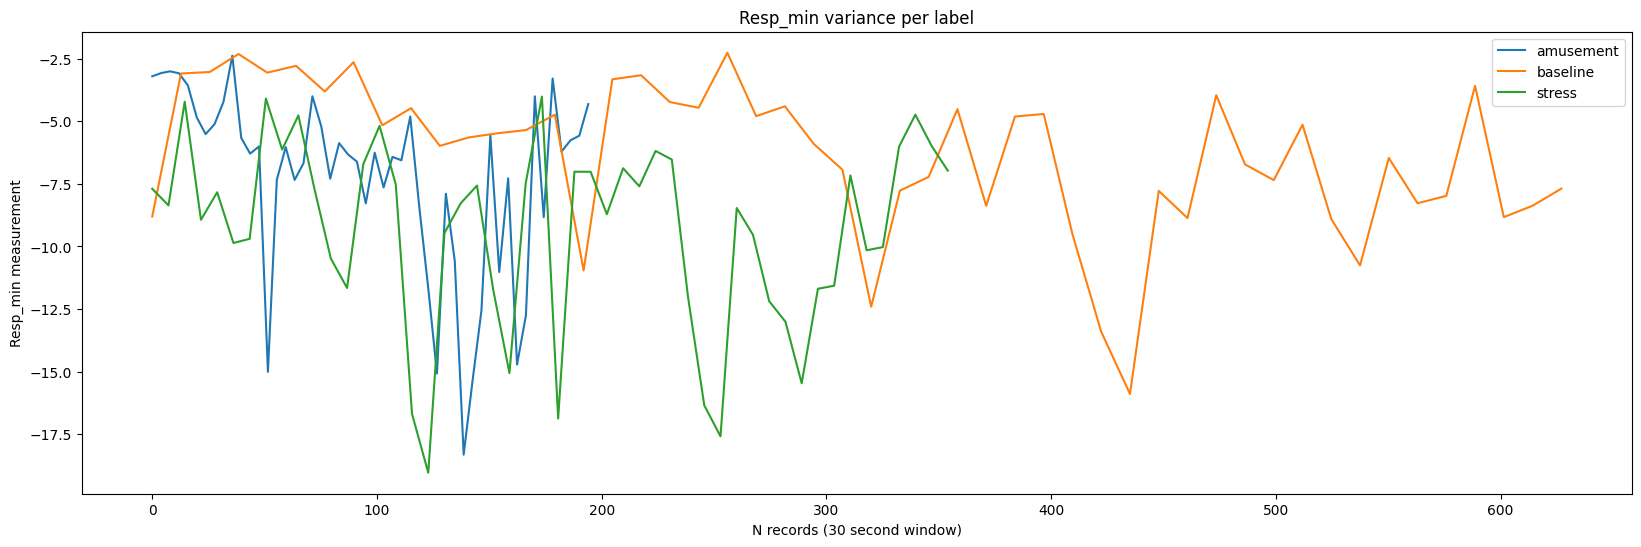

## Resp_max

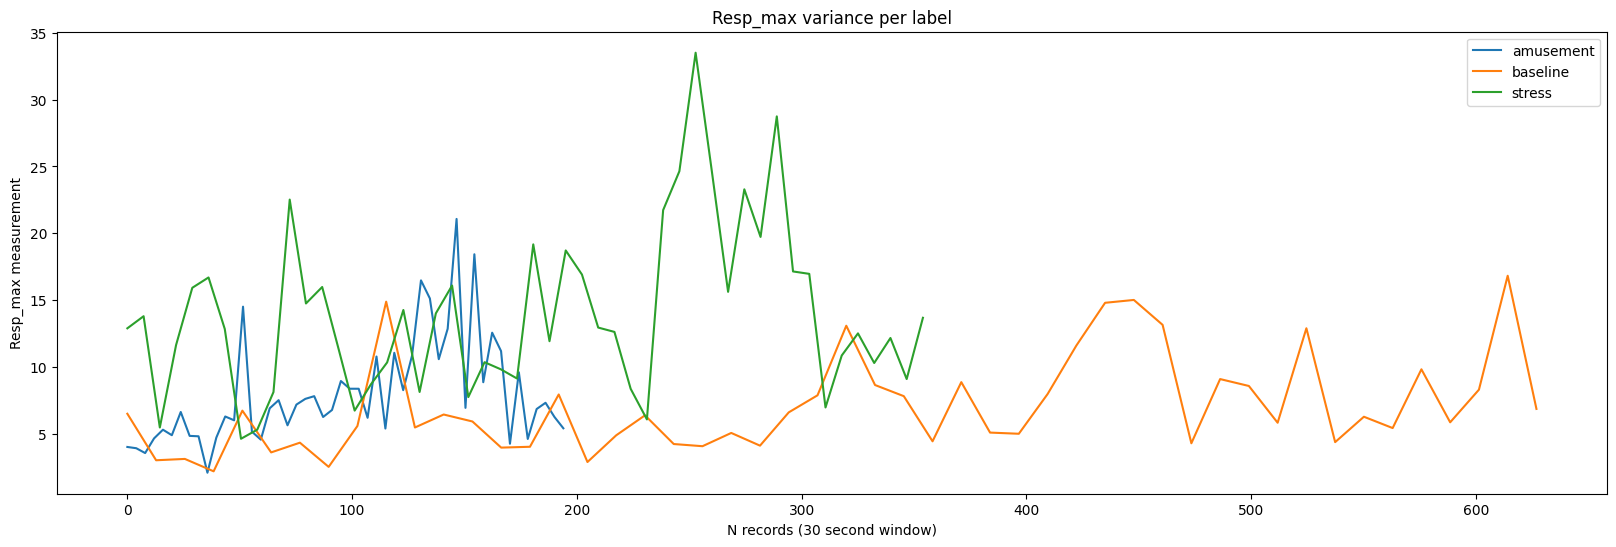

## BVP_peak_freq

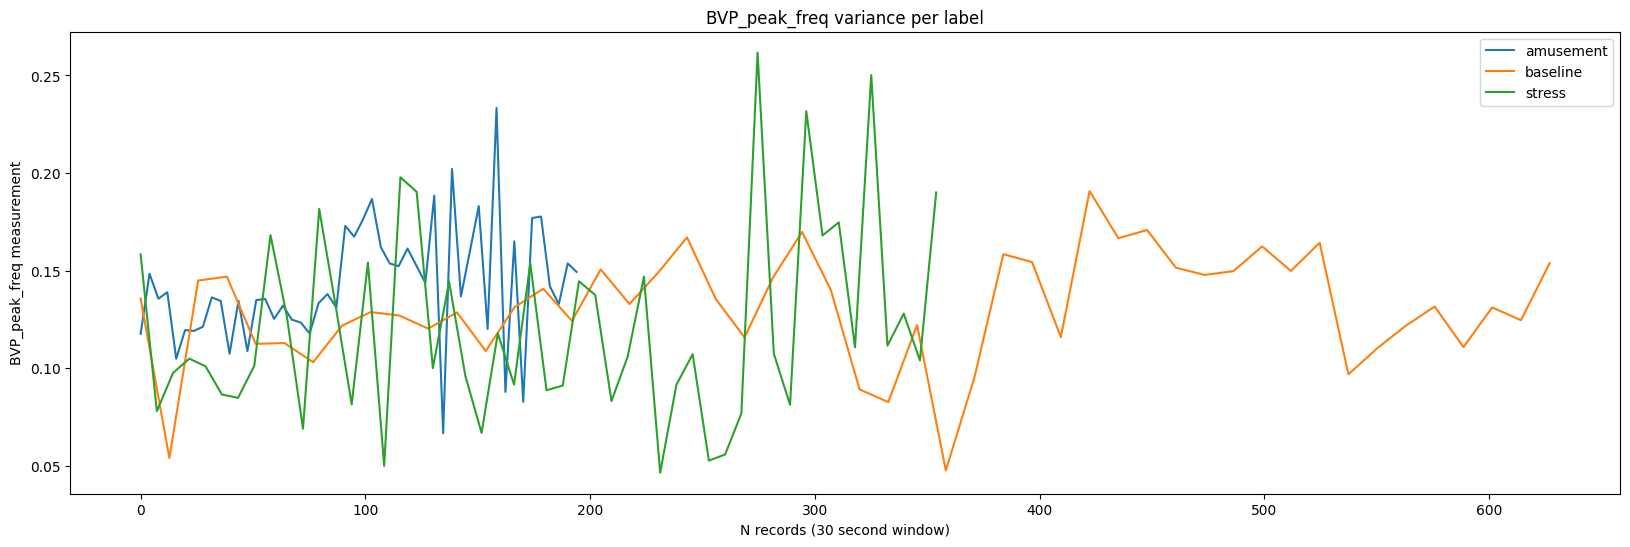

## ACC_mean_mean

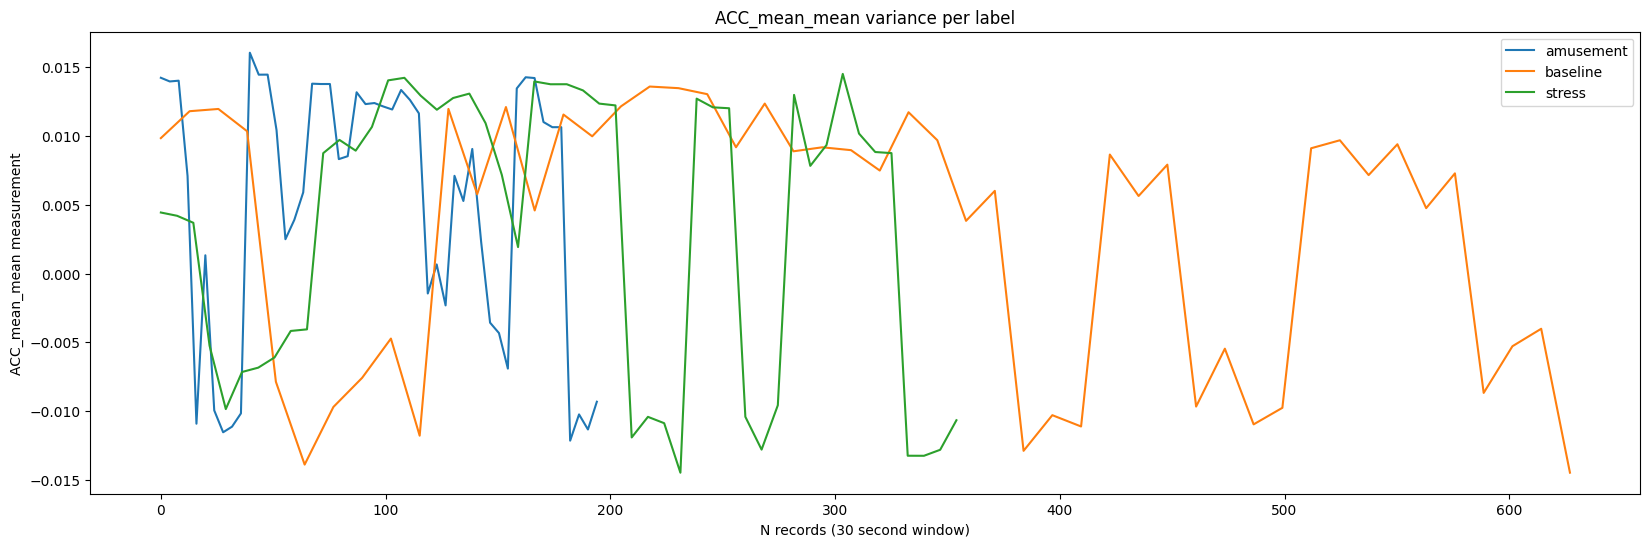

## ACC_mean_std

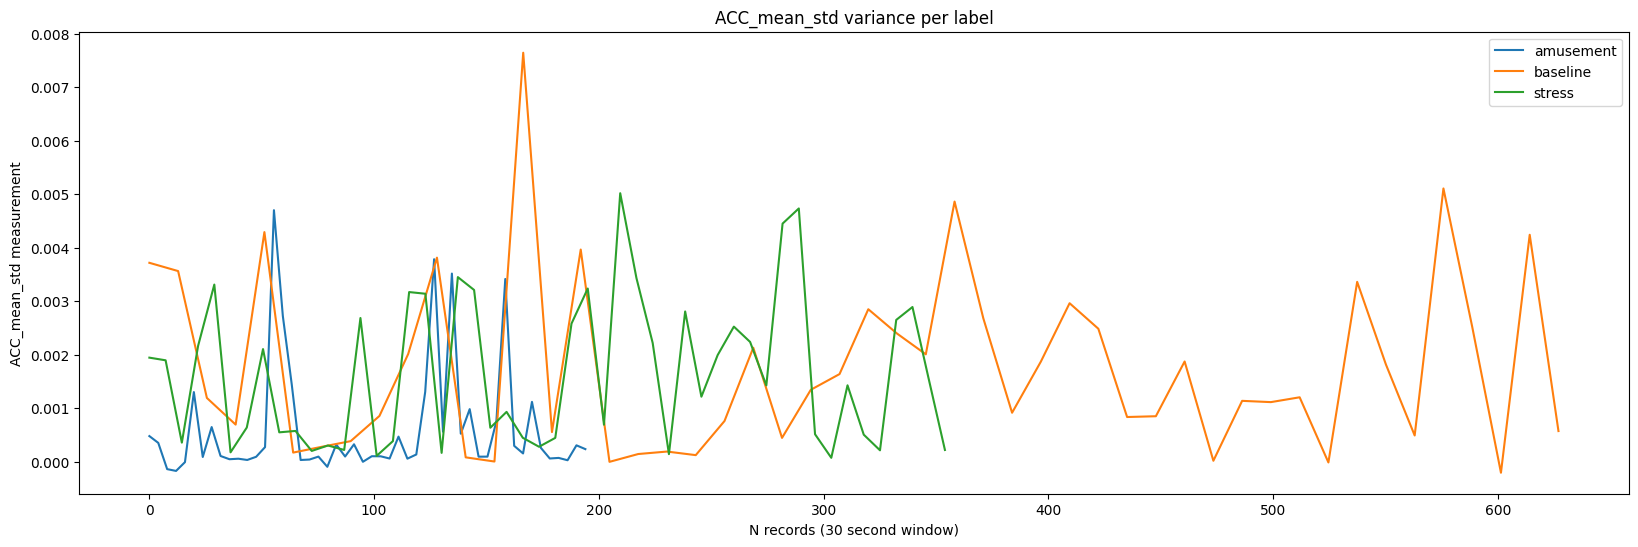

## ACC_mean_min

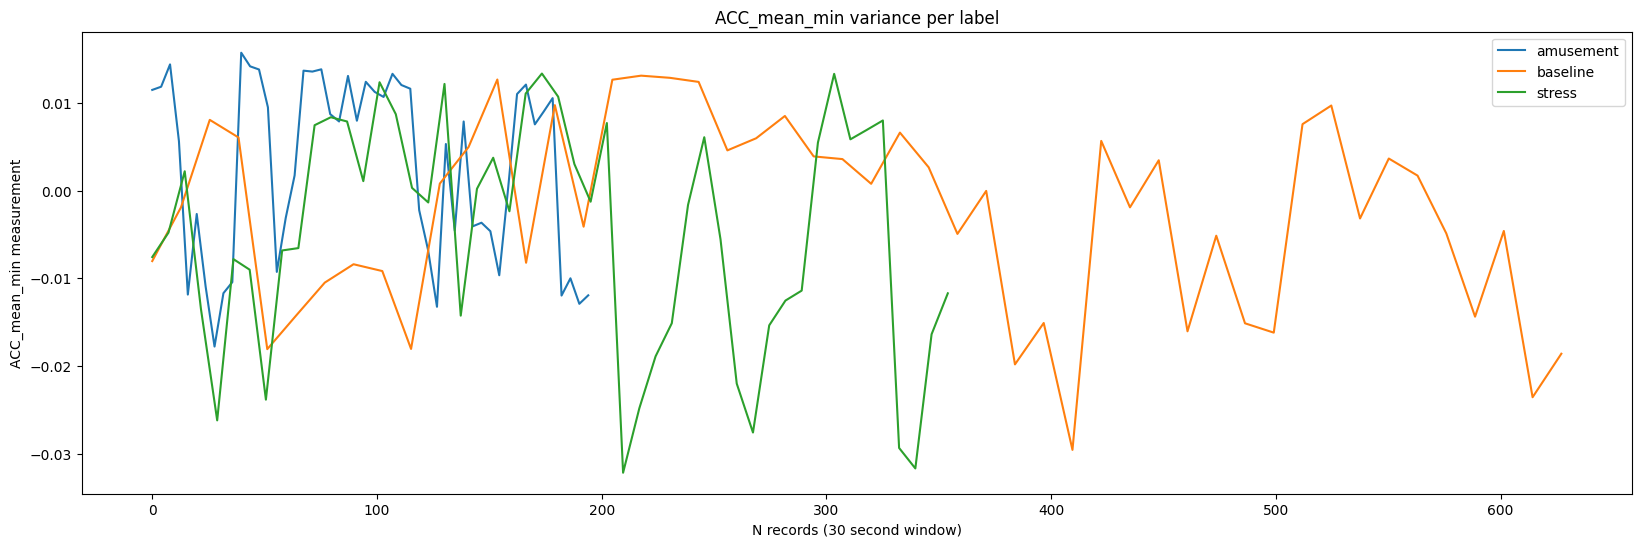

## ACC_mean_max

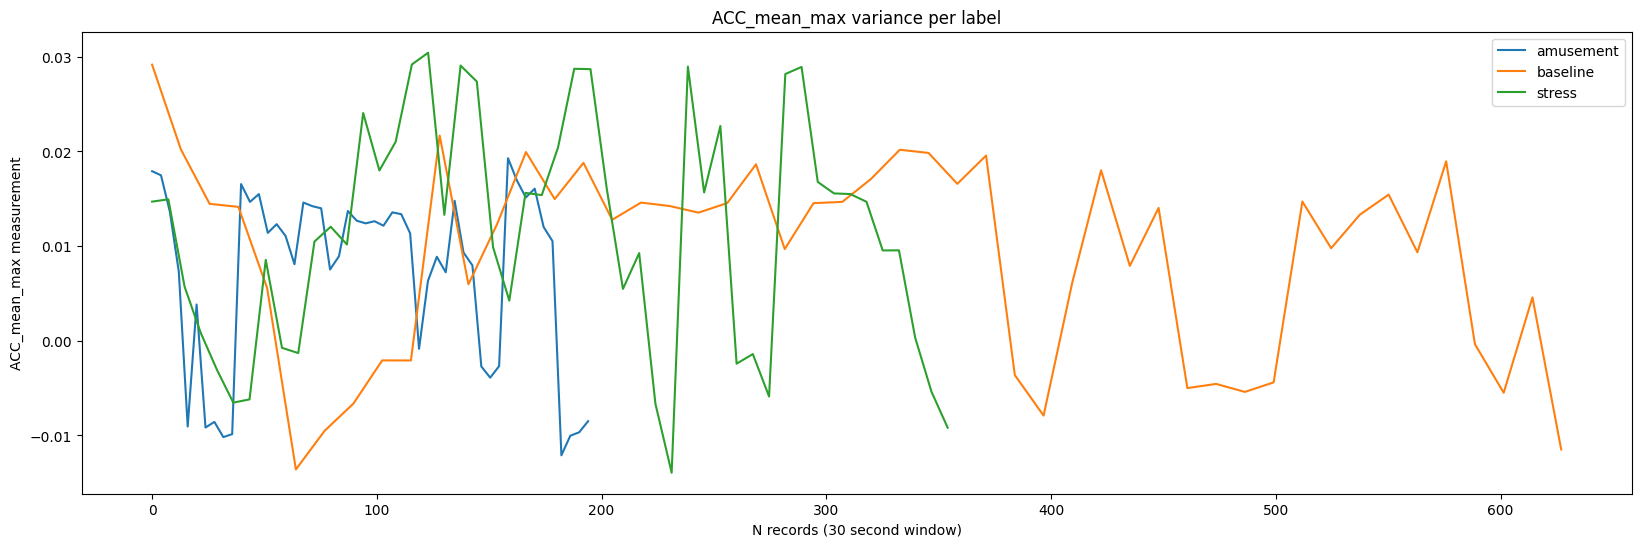

In [49]:
from IPython.display import display, Markdown
for f in features:
    display(Markdown(f"## {f} feature"))
    plot = plot_smooth_data_per_label(stress_level_data, f, num=50, b_spline_degree=2)
    display(Markdown(matplotlib_fig_to_markdown(plot)))

In [57]:
%%jmd
# Findings from feature variance

# Findings from feature variance

From the plots above we can clearly see that in general the `net_acc_std`, `RESP_max`, `RESP_std` and all the `EDA` features are higher when a person is stressed. The `ACC`, `TEMP`, `Resp_min` and `BVP` features do not show any sustantial difference between the stress levels. Additionally, there is not any absorvabale difference between baseline and amusement stress levels that is correlated to the features.

Now we will use the SelectKBest method to select the best features. We will use the `f_classif` method as we are dealing with numerical input and categorical output.

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif
empE4_features = features.to_list()
empE4_features.remove('Resp_std')
empE4_features.remove('Resp_min')
empE4_features.remove('Resp_max')
data_m3_X = data_m2[empE4_features]
data_m3_y = data_m2['label']
print(f"Old data shape: {data_m3_X.shape}")	

data_m3_X_new = SelectKBest(f_classif, k=5).fit_transform(data_m3_X, data_m3_y)
print(f"New data shape: {data_m3_X_new.shape}")

selected_features = data_m3_X.columns[SelectKBest(f_classif, k=5).fit(data_m3_X, data_m3_y).get_support()]
selected_features

Old data shape: (1178, 24)
New data shape: (1178, 5)


Index(['net_acc_std', 'net_acc_max', 'EDA_tonic_mean', 'EDA_tonic_min',
       'EDA_tonic_max'],
      dtype='object')

We can observe that the selected features are 'net_acc_std', 'net_acc_max', 'EDA_tonic_mean', 'EDA_tonic_min', 'EDA_tonic_max', 'Resp_std', 'Resp_max'.  Now we will plot each feature against the target variable per subject to observe if there is a clearer diferentiation between the stress levels in the selected features .

In [51]:
%%jmd
# Data analysis by subject
[//]: # (-.- .tabset .tabset-pills .tabset-fade)

# Data analysis by subject
<span class='pj-token' style='display: none;'>.tabset|O_O|.tabset-pills|O_O|.tabset-fade</span>

In [52]:
def plot_smooth_data_per_label_per_subject(data, feature, subjects, labels=['amusement', 'baseline', 'stress'], num=100, b_spline_degree=3):
    plt.figure(figsize=(20, 20))

    for s in subjects:
        s_index = np.where(subjects == s)[0][0]
        plt.subplot(5, 3, s_index + 1)
        plt.title(f"{feature} variance per label for subject {s}")
        plt.xlabel("N records (30 second window)")
        plt.ylabel(f"{feature} measurement")
        
        data1 = [data[0][data[0]['subject'] == s].reset_index(drop=True), 
            data[1][data[1]['subject'] == s].reset_index(drop=True), 
            data[2][data[2]['subject'] == s].reset_index(drop=True)]

        # loop through the data for each stress level, smooth it and plot it
        for d in data1:
            xnew = np.linspace(d[feature].index.min(), d[feature].index.max(), num)
            spl = make_interp_spline(d[feature].index, d[feature], k=b_spline_degree)
            power_smooth = spl(xnew)
            plt.plot(xnew, power_smooth)
        plt.legend(labels, loc='upper right')

    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)
    return plt.gcf()

In [53]:
data_m3 = data_m2[[*selected_features.tolist(), 'label', 'subject']]
amusement_data = data_m3[data_m3['label'] == 0].reset_index(drop=True)
baseline_data = data_m3[data_m3['label'] == 1].reset_index(drop=True)
stress_data = data_m3[data_m3['label'] == 2].reset_index(drop=True)

#for f in selected_features.tolist():
#    plot_smooth_data_per_label_per_subject([amusement_data, baseline_data, stress_data], feature=f, subjects=data_m2['subject'].unique())

## net_acc_std variance per label for all subjects

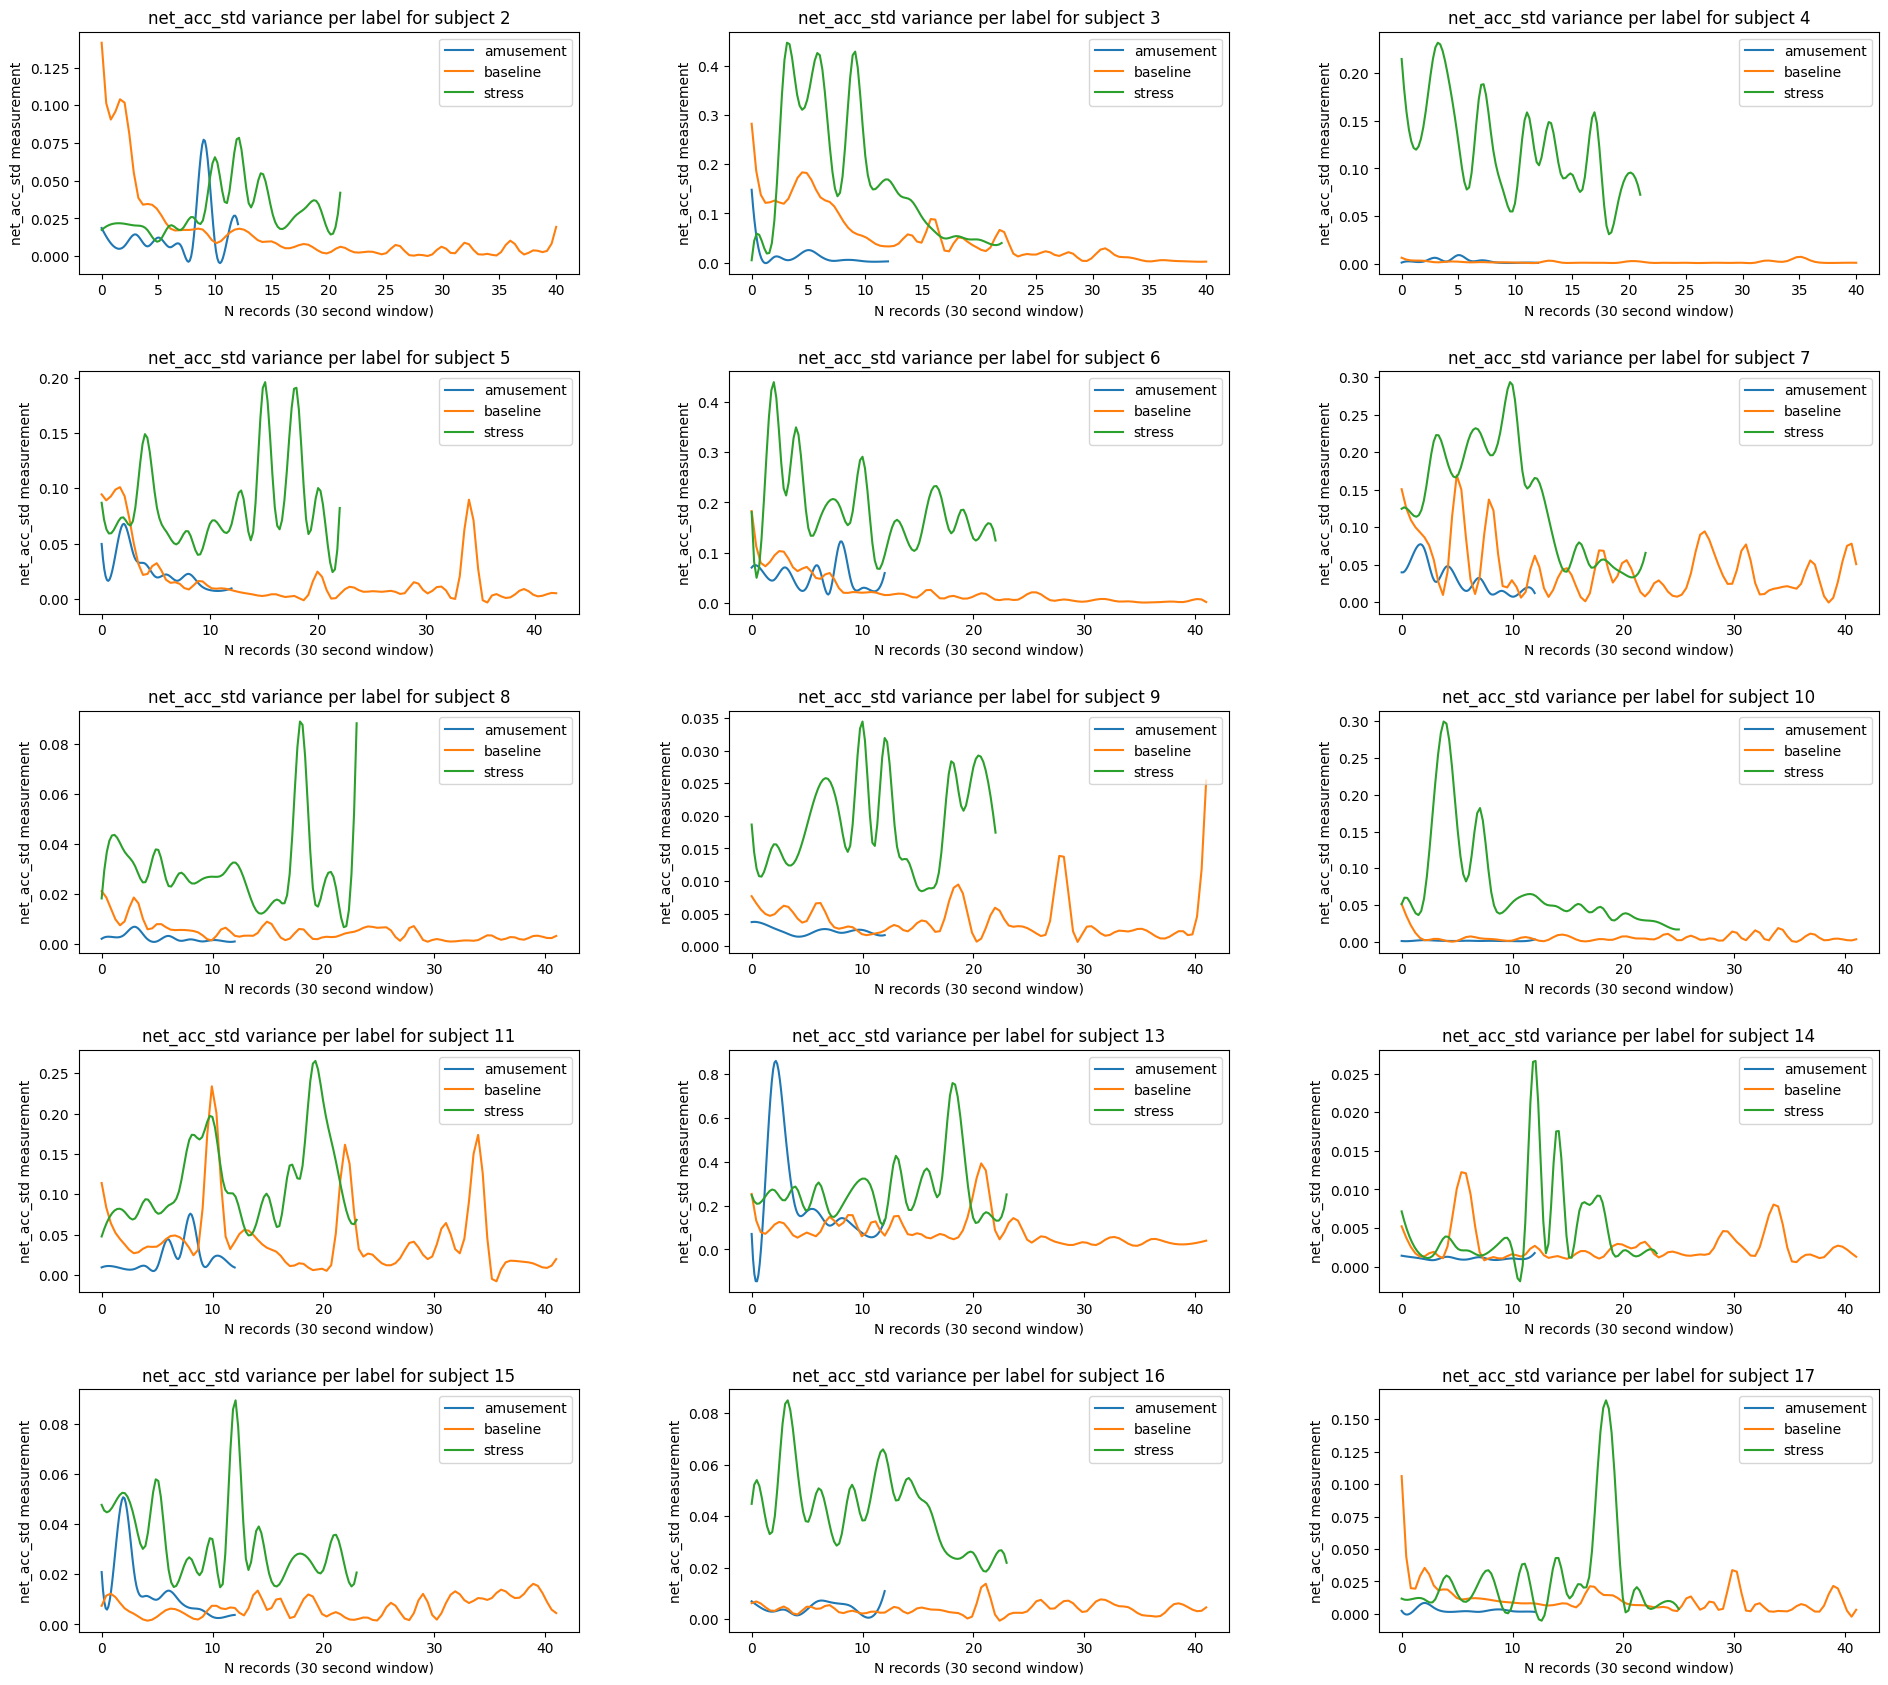

## net_acc_max variance per label for all subjects

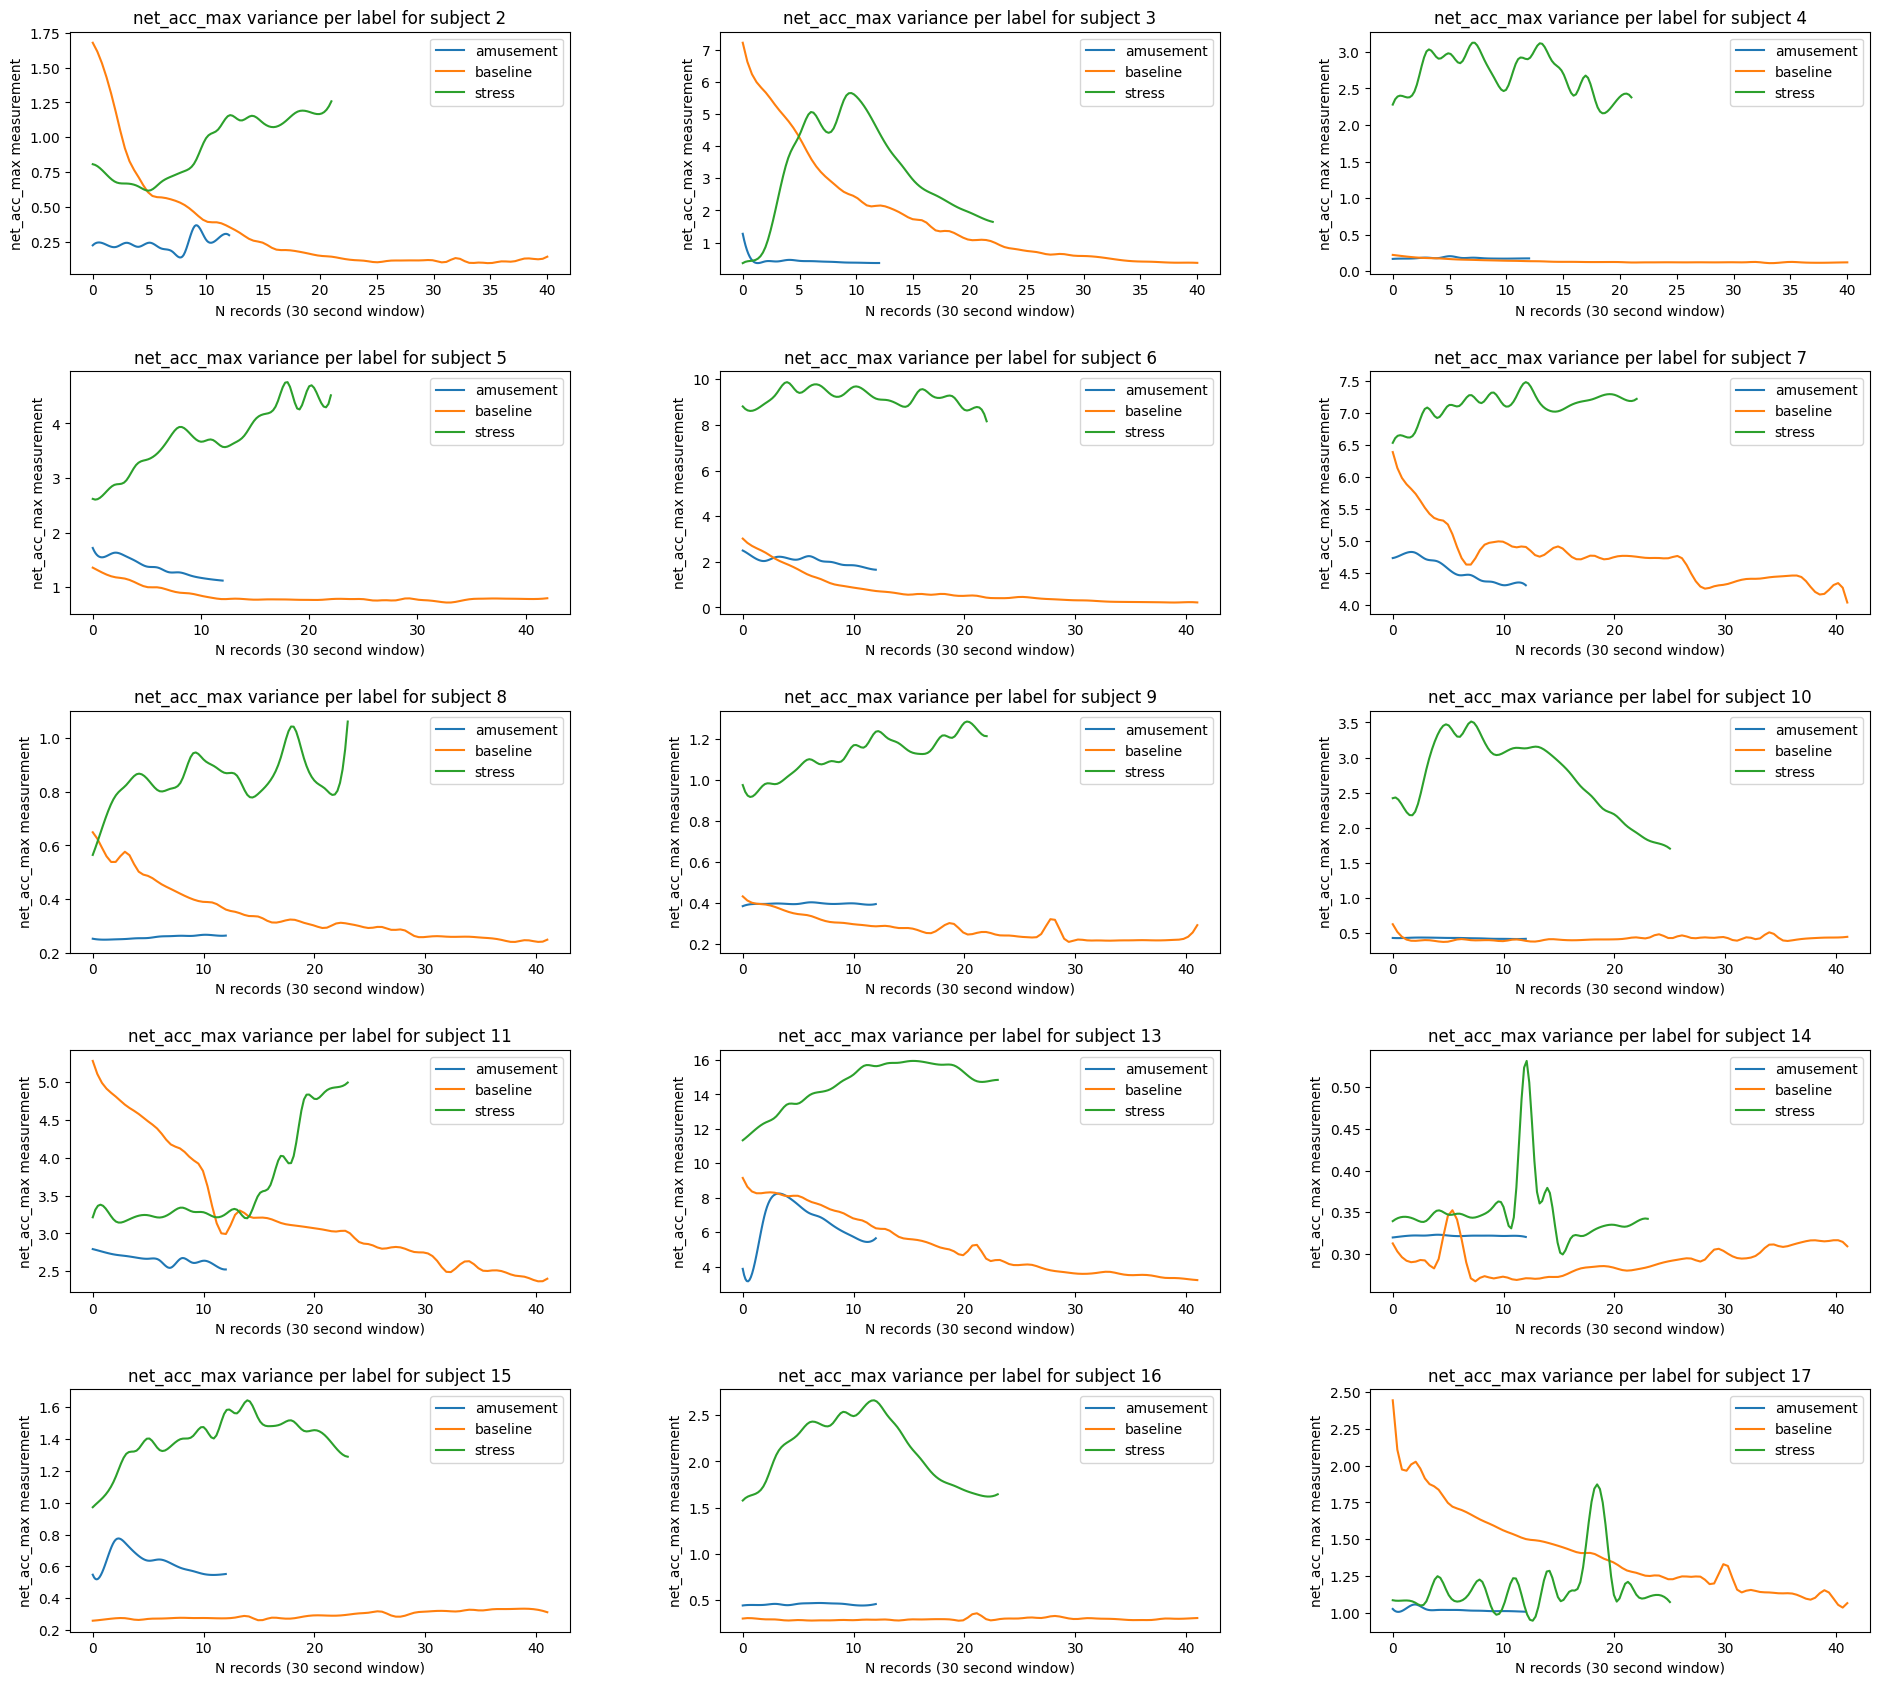

## EDA_tonic_mean variance per label for all subjects

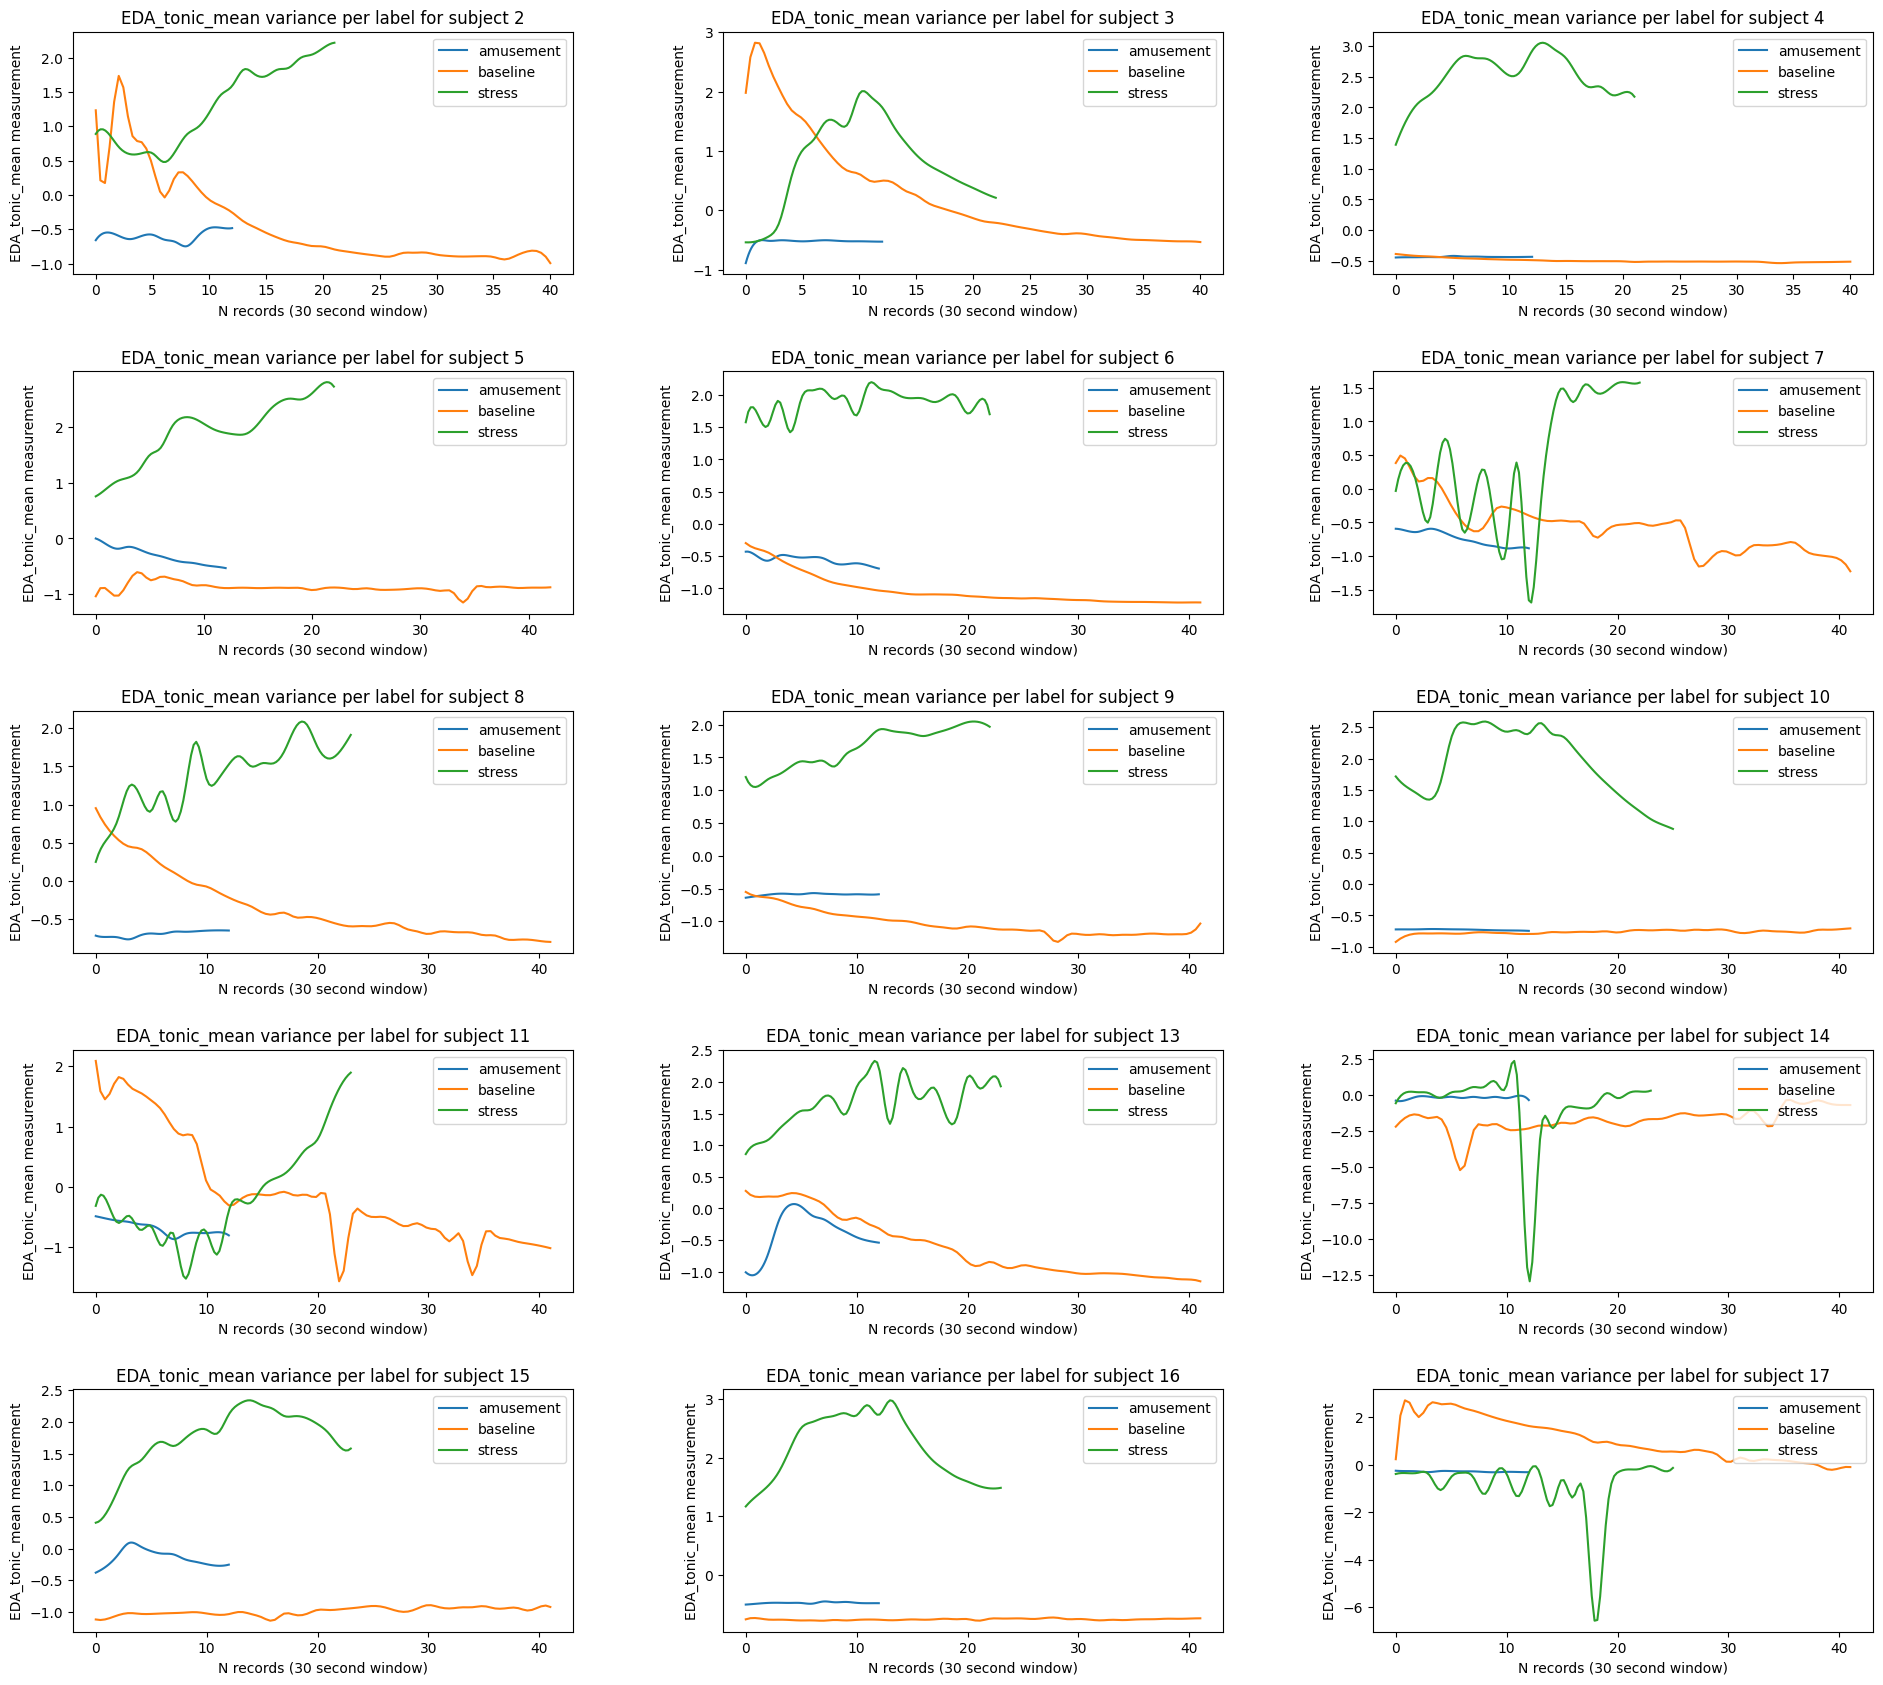

## EDA_tonic_min variance per label for all subjects

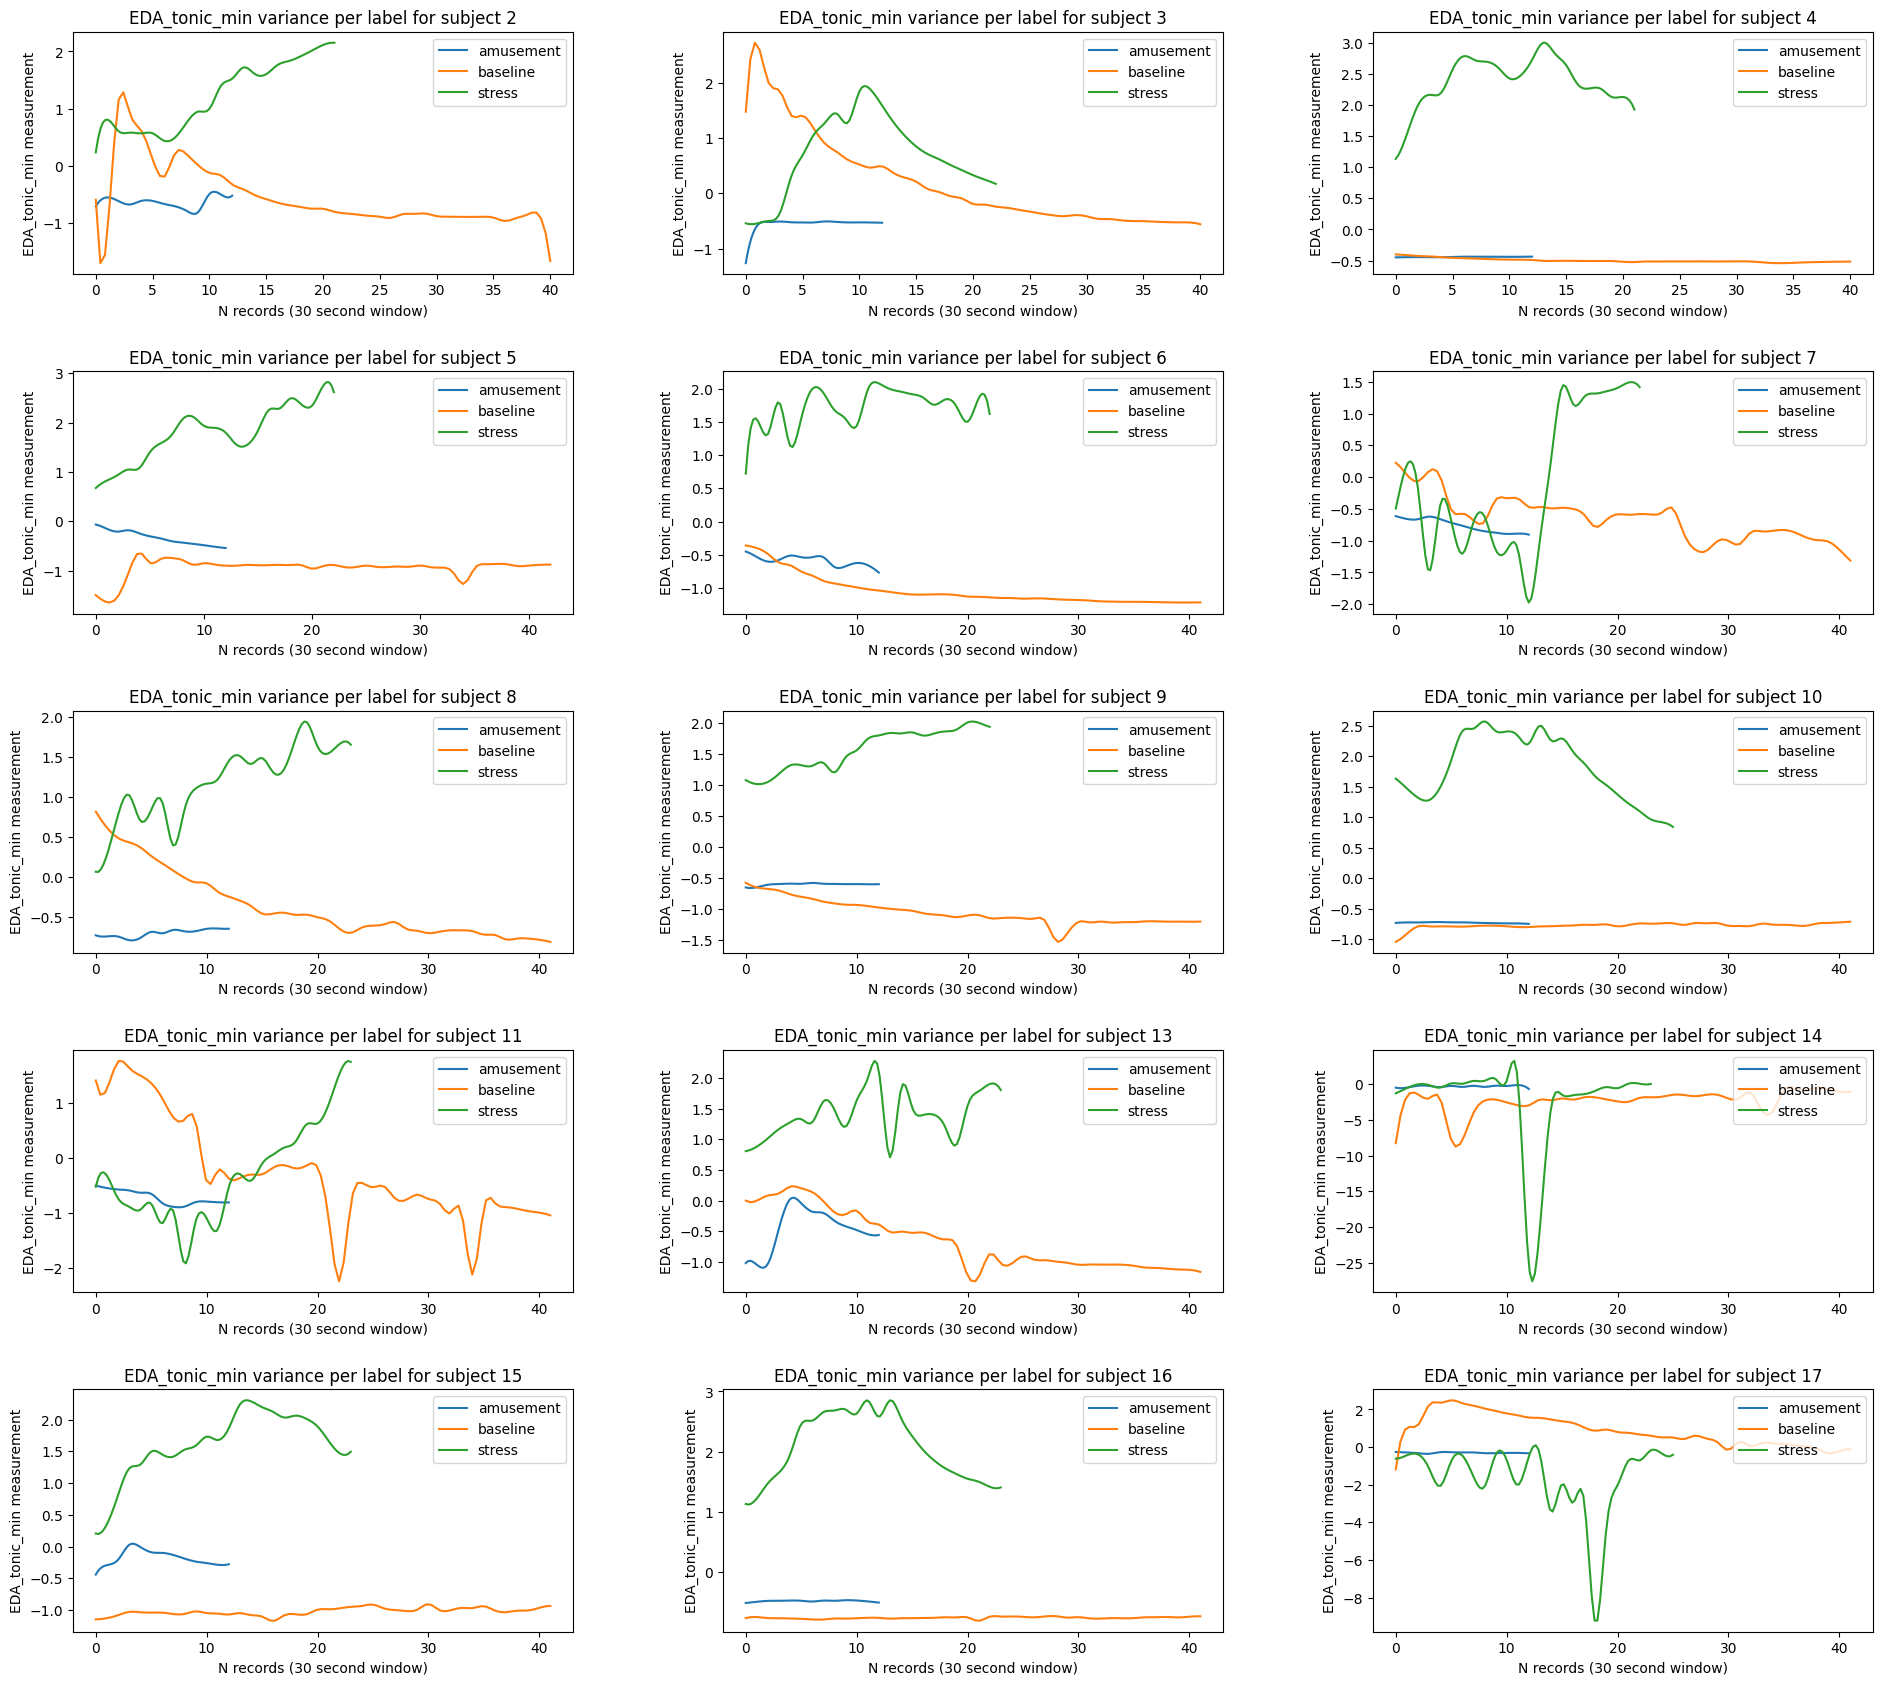

## EDA_tonic_max variance per label for all subjects

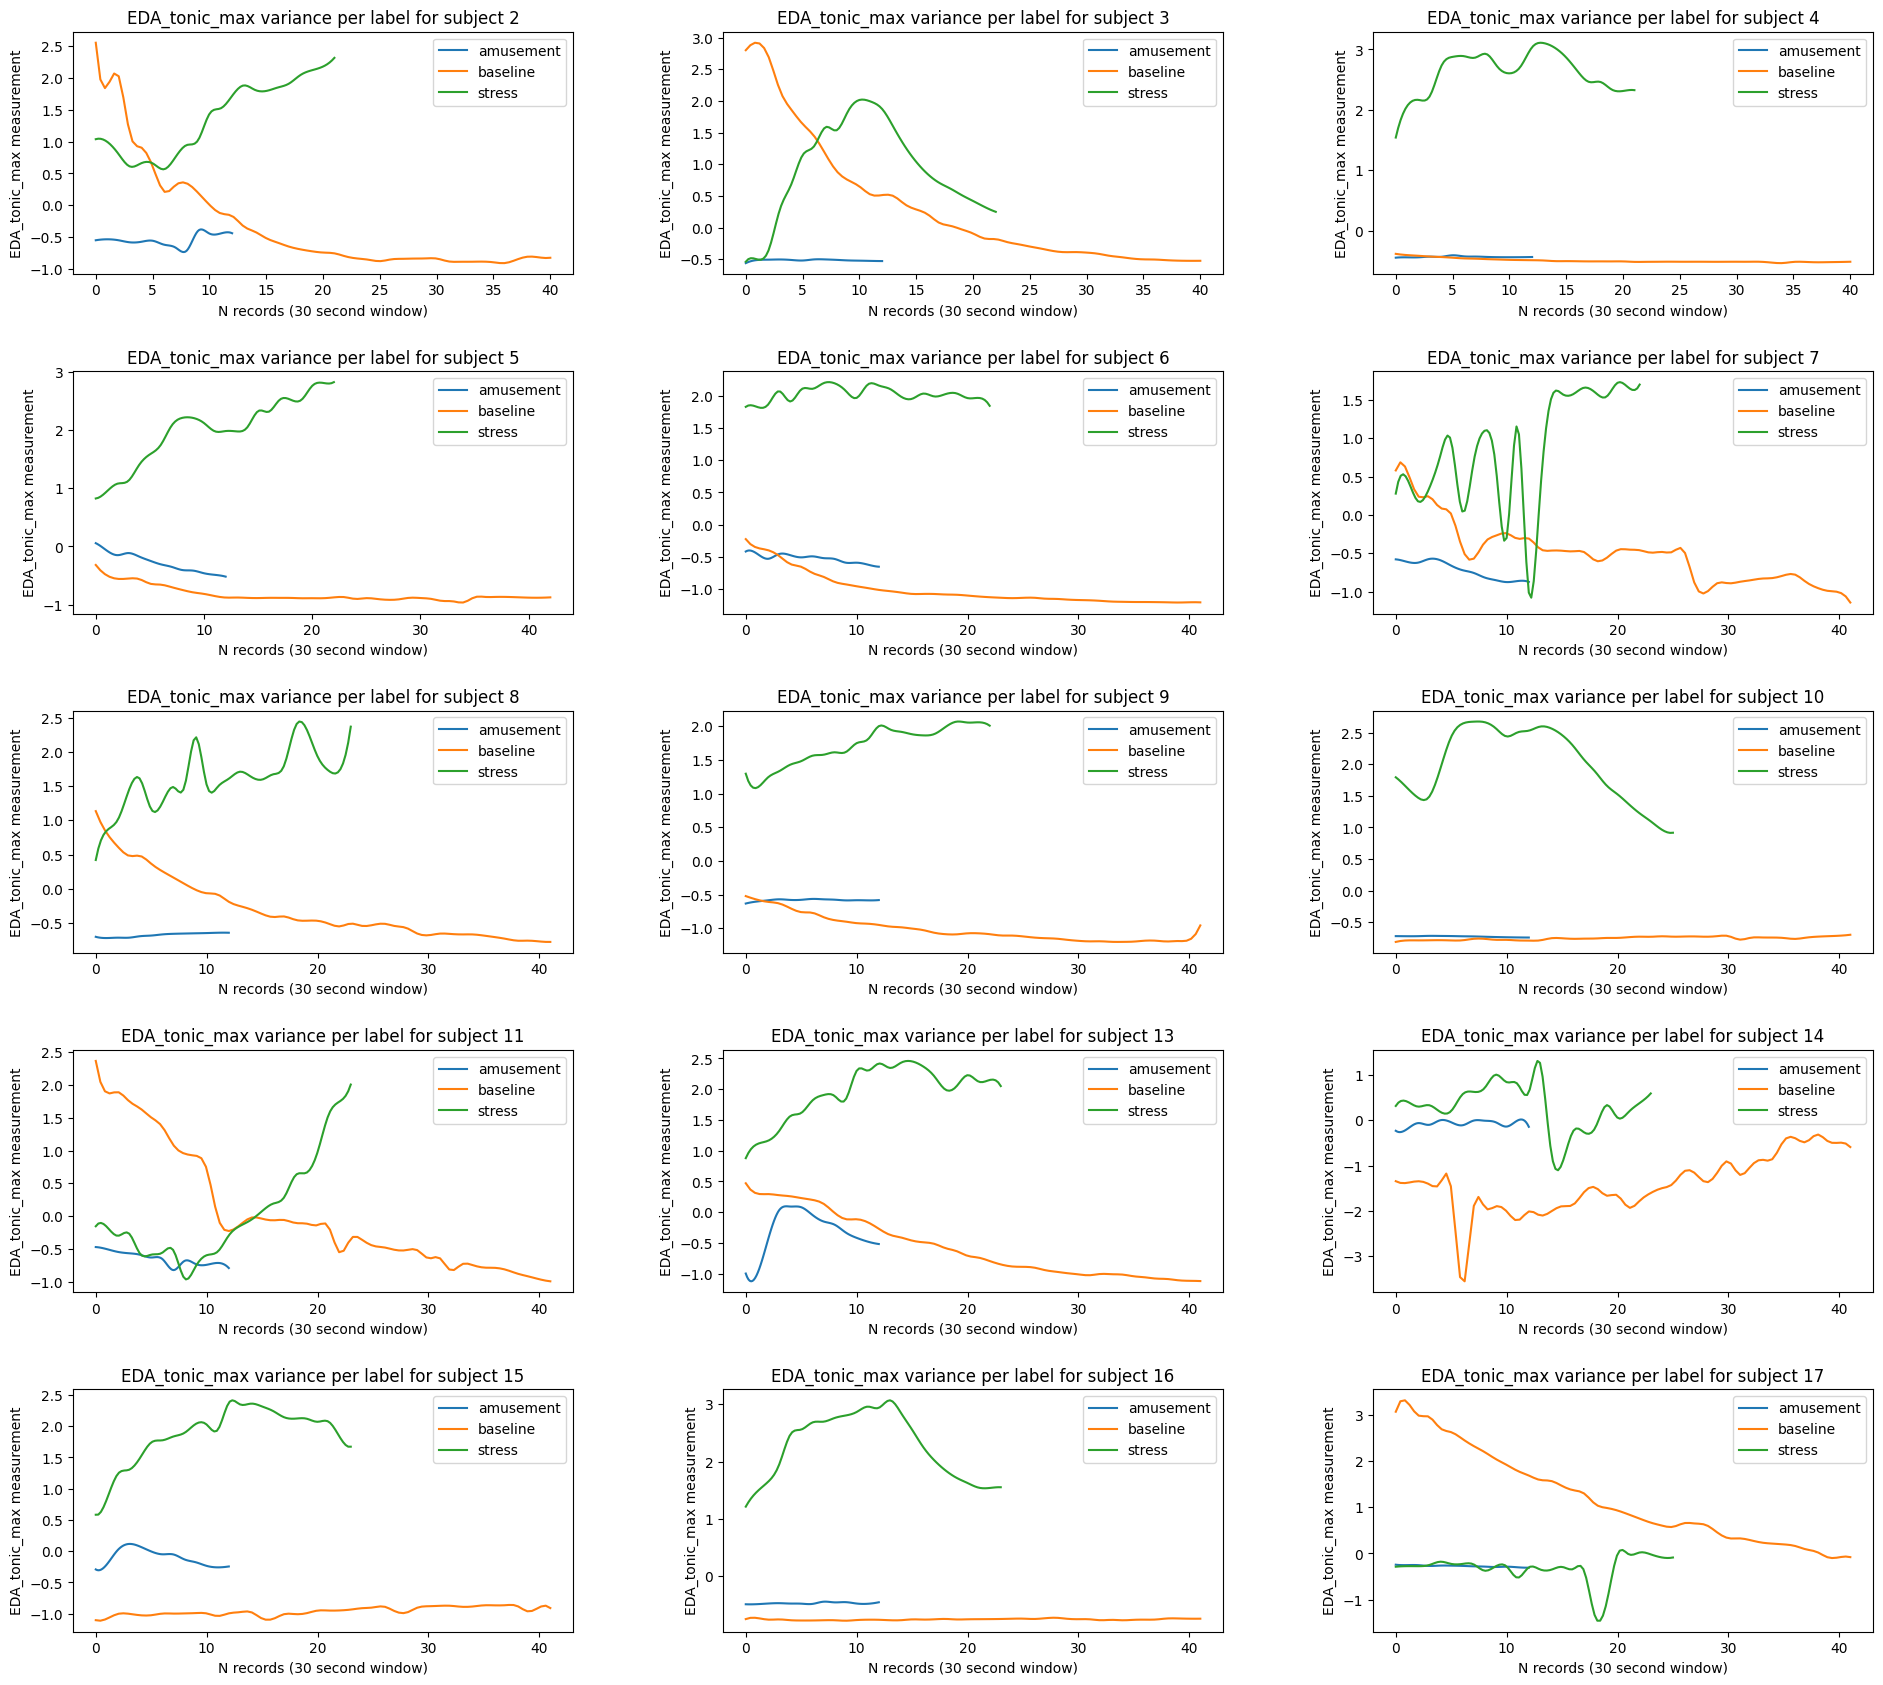

In [54]:
for f in selected_features.tolist():
    display(Markdown(f"## {f} variance per label for all subjects"))
    plot = plot_smooth_data_per_label_per_subject([amusement_data, baseline_data, stress_data], feature=f, subjects=data_m2['subject'].unique())
    display(Markdown(matplotlib_fig_to_markdown(plot)))

# Conclusion

From observing the graphs above we can conclude that for the `EDA_tonic` features almost all the subjects, except for subject 17, have a noticeably higher and fluctoating values when they are stressed. In the case of the `net_acc_std` feature we can see that there are way more fluctiotaions in the readings of stress patients and the values are generally higher, the difference in the values of stressed and baseline periods can be observed more clearly in the `net_acc_max` feature graphs as there aren't any big oscilations. We can conclude that even a basic Machine Learning model, or a thresholding algorithm will be able to classify the stress levels with a high accuracy, because of the clear difference between the features of the different stress levels.